<a href="https://colab.research.google.com/github/DarraghQV/Algorithms/blob/master/MazeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np

MAZE_WIDTH = 10
MAZE_HEIGHT = 10
START = (0, 0)
GOAL = (9, 9)

# 10x10 Maze representation (1 = wall, 0 = free space)
MAZE = np.array([
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
])

# Directions for movement: up, down, left, right
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def generate_random_path():
    path = []
    position = START
    visited = set()  # Keep track of visited positions to avoid backtracking

    while position != GOAL:
        visited.add(position)
        possible_moves = []

        # Check each direction and add to possible moves if valid
        for move in MOVES:
            new_position = (position[0] + move[0], position[1] + move[1])

            if 0 <= new_position[0] < MAZE_HEIGHT and 0 <= new_position[1] < MAZE_WIDTH:
                if MAZE[new_position[0], new_position[1]] == 0 and new_position not in visited:
                    possible_moves.append(new_position)

        if not possible_moves:
            # If no valid moves are possible, break the loop (avoid infinite loops)
            break

        # Choose a random valid move from possible moves
        move = random.choice(possible_moves)
        path.append(move)
        position = move

        # Prevent paths from getting too long and unnecessary
        if len(path) > 200:
            break

    return path


# Fitness function: shorter path and closer to goal
def fitness(path):
    if not path:
        return 0
    last_position = path[-1]
    distance_to_goal = abs(last_position[0] - GOAL[0]) + abs(last_position[1] - GOAL[1])
    return max(0, 200 - len(path) - distance_to_goal)

# Crossover function: Combine two paths
def crossover(path1, path2):
    split_point = random.randint(1, min(len(path1), len(path2)) - 1)
    new_path = path1[:split_point] + path2[split_point:]
    return new_path

# Mutation function: Make a small random change to a path
def mutate(path):
    if random.random() < 0.2:  # Increased mutation probability
        index = random.randint(0, len(path)-1)  # Select random position in the path
        move = random.choice(MOVES)  # Select a random move
        new_position = (path[index][0] + move[0], path[index][1] + move[1])
        # Ensure the new position is within bounds and not a wall
        if 0 <= new_position[0] < MAZE_HEIGHT and 0 <= new_position[1] < MAZE_WIDTH and MAZE[new_position[0], new_position[1]] == 0:
            path[index] = new_position
    return path

# Main function to evolve paths
def genetic_algorithm():
    population = [generate_random_path() for _ in range(50)]
    generations = 500

    for generation in range(generations):
        print(f"Generation {generation}:")

        # Evaluate fitness of all paths
        population.sort(key=lambda p: fitness(p), reverse=True)

        # Print all paths in the population
        for i, path in enumerate(population):
            print(f"Path {i+1}: {path} (Fitness: {fitness(path)})")

        # Check if the best path reaches the goal
        if fitness(population[0]) > 0:
            print(f"Solution found in generation {generation}")
            return population[0]

        # Select the top 20% for reproduction
        selected = population[:10]  # Top 10 paths

        # Create new population using crossover and mutation
        new_population = []
        while len(new_population) < len(population):
            parent1, parent2 = random.choice(selected), random.choice(selected)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    print("Solution not found within the maximum generations.")
    return population[0]

# Run the genetic algorithm
solution_path = genetic_algorithm()
print(f"Solution path: {solution_path}")


Generation 0:
Path 1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 2: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 3: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 4: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 5: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 6: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 7: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 8: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 9: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 10: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 11: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 12: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 13: [(0, 1), (1, 1

In [ ]:
import random
import numpy as np

MAZE_WIDTH = 10
MAZE_HEIGHT = 10
START = (0, 0)
GOAL = (9, 9)

# 10x10 Maze representation (1 = wall, 0 = free space, 2 = goal)
MAZE = np.array([
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 2]  # Goal marked as '2'
])

# Directions for movement: up, down, left, right
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def generate_random_path():
    path = []
    position = START
    visited = set()  # Keep track of visited positions to avoid backtracking

    while position != GOAL:
        visited.add(position)
        possible_moves = []

        # Check each direction and add to possible moves if valid
        for move in MOVES:
            new_position = (position[0] + move[0], position[1] + move[1])

            if 0 <= new_position[0] < MAZE_HEIGHT and 0 <= new_position[1] < MAZE_WIDTH:
                if MAZE[new_position[0], new_position[1]] != 1 and new_position not in visited:
                    possible_moves.append(new_position)

        if not possible_moves:
            # If no valid moves are possible, break the loop (avoid infinite loops)
            break

        # Choose a random valid move from possible moves
        move = random.choice(possible_moves)
        path.append(move)
        position = move

        # Stop if the goal is reached
        if position == GOAL:
            path.append(position)
            break

        # Prevent paths from getting too long and unnecessary
        if len(path) > 200:
            break

    return path

# Fitness function: shorter path and closer to goal
def fitness(path):
    if not path:
        return 0
    last_position = path[-1]

    # If the last position is the goal, return a high fitness score
    if last_position == GOAL:
        return 1000  # Arbitrary large value to represent reaching the goal

    distance_to_goal = abs(last_position[0] - GOAL[0]) + abs(last_position[1] - GOAL[1])
    return max(0, 200 - len(path) - distance_to_goal)

# Crossover function: Combine two paths
def crossover(path1, path2):
    split_point = random.randint(1, min(len(path1), len(path2)) - 1)
    new_path = path1[:split_point] + path2[split_point:]
    return new_path

# Mutation function: Make a small random change to a path
def mutate(path):
    if random.random() < 0.2:  # Increased mutation probability
        index = random.randint(0, len(path)-1)  # Select random position in the path
        move = random.choice(MOVES)  # Select a random move
        new_position = (path[index][0] + move[0], path[index][1] + move[1])
        # Ensure the new position is within bounds and not a wall
        if 0 <= new_position[0] < MAZE_HEIGHT and 0 <= new_position[1] < MAZE_WIDTH and MAZE[new_position[0], new_position[1]] != 1:
            path[index] = new_position
    return path

# Main function to evolve paths
def genetic_algorithm():
    population = [generate_random_path() for _ in range(50)]
    generations = 500

    for generation in range(generations):
        print(f"Generation {generation}:")

        # Evaluate fitness of all paths
        population.sort(key=lambda p: fitness(p), reverse=True)

        # Print all paths in the population
        for i, path in enumerate(population):
            print(f"Path {i+1}: {path} (Fitness: {fitness(path)})")

        # Check if the best path reaches the goal
        if fitness(population[0]) >= 1000:
            print(f"Solution found in generation {generation}")
            return population[0]

        # Select the top 20% for reproduction
        selected = population[:10]  # Top 10 paths

        # Create new population using crossover and mutation
        new_population = []
        while len(new_population) < len(population):
            parent1, parent2 = random.choice(selected), random.choice(selected)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    print("Solution not found within the maximum generations.")
    return population[0]

# Run the genetic algorithm
solution_path = genetic_algorithm()
print(f"Solution path: {solution_path}")


Generation 0:
Path 1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 2: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 3: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 4: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 5: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 6: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 7: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 8: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 9: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 10: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 11: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)] (Fitness: 182)
Path 12: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2)] (Fitness: 182)
Path 13: [(0, 1), (1, 1

In [ ]:
import numpy as np
from copy import deepcopy

# Define the cost function that calculates the energy consumption (distance)
def energy_consumption(x, waypoints):
    total_distance = 0
    current_position = np.array([0, 0])  # Assume initial position at origin

    for i in range(len(waypoints)):
        theta1 = x[2 * i]
        theta2 = x[2 * i + 1]

        # Kinematic model of the robotic arm: Calculate end-effector position
        x1 = np.cos(theta1)
        y1 = np.sin(theta1)
        x2 = x1 + np.cos(theta2)
        y2 = y1 + np.sin(theta2)

        new_position = np.array([x2, y2])
        total_distance += np.linalg.norm(new_position - current_position)  # Add distance from previous position
        current_position = new_position

    return total_distance

class problem:
    def __init__(self, waypoints):
        self.number_of_genes = 2 * len(waypoints)  # Two angles (theta1, theta2) per waypoint
        self.max_value = np.pi  # Maximum angle (in radians)
        self.min_value = -np.pi  # Minimum angle (in radians)
        self.cost_function = lambda x: energy_consumption(x, waypoints)  # Cost is energy consumption

class individual:
    def __init__(self, prob):
        self.chromosome = np.random.uniform(prob.min_value, prob.max_value, prob.number_of_genes)
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, rate_of_gene_mutation, range_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] += np.random.randn() * range_of_gene_mutation

    def crossover(self, parent2, explore_crossover):
        alpha = np.random.uniform(-explore_crossover, 1 + explore_crossover)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = alpha * self.chromosome + (1 - alpha) * parent2.chromosome
        child2.chromosome = alpha * parent2.chromosome + (1 - alpha) * self.chromosome
        return child1, child2

class parameters:
    def __init__(self):
        self.population = 100  # Population size
        self.number_of_generations = 100  # Number of generations
        self.child_rate_per_generation = 1  # Number of children per generation
        self.crossover_explore_rate = 0.2  # Exploration factor for crossover
        self.gene_mutate_range = 0.1  # Range of mutation
        self.gene_mutate_rate = 0.2  # Mutation rate

# Function to choose two random indices from the population
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Genetic algorithm to solve the robotic arm problem
def run_genetic(prob, params):
    cost_function = prob.cost_function

    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    explore_crossover = params.crossover_explore_rate
    gene_mutate_rate = params.gene_mutate_rate
    gene_mutate_range = params.gene_mutate_range

    population = []
    best_solution = individual(prob)
    best_solution.cost = np.infty

    for i in range(number_in_population):
        new_individual = individual(prob)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)

    for _iteration in range(max_number_of_generations):
        children = []
        while len(children) < number_of_children_per_generation:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child1, child2 = parent1.crossover(parent2, explore_crossover)
            child1.mutate(gene_mutate_rate, gene_mutate_range)
            child1.cost = cost_function(child1.chromosome)
            child2.mutate(gene_mutate_rate, gene_mutate_range)
            child2.cost = cost_function(child2.chromosome)

            children.append(child1)
            children.append(child2)

        population += children
        population = sorted(population, key=lambda x: x.cost)
        population = population[:number_in_population]

        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Best Solution for iteration {_iteration} has cost of {best_solution.cost}")

    return best_solution

# Example of running the genetic algorithm with a set of waypoints
waypoints = [(3, 4), (5, 6), (7, 8)]  # Example waypoints in 2D space
p1 = problem(waypoints)
par1 = parameters()

best_solution = run_genetic(p1, par1)
print("Best Chromosome: ", best_solution.chromosome)


Best Solution for iteration 0 has cost of 0.7068776094496394
Best Solution for iteration 1 has cost of 0.36901566572556166
Best Solution for iteration 2 has cost of 0.297016840643325
Best Solution for iteration 3 has cost of 0.25227494929515754
Best Solution for iteration 4 has cost of 0.25227494929515754
Best Solution for iteration 5 has cost of 0.056810031366119895
Best Solution for iteration 6 has cost of 0.056810031366119895
Best Solution for iteration 7 has cost of 0.056810031366119895
Best Solution for iteration 8 has cost of 0.056810031366119895
Best Solution for iteration 9 has cost of 0.054794978565872045
Best Solution for iteration 10 has cost of 0.054794978565872045
Best Solution for iteration 11 has cost of 0.008708425924804353
Best Solution for iteration 12 has cost of 0.008708425924804353
Best Solution for iteration 13 has cost of 0.008708425924804353
Best Solution for iteration 14 has cost of 0.008708425924804353
Best Solution for iteration 15 has cost of 0.0087084259248

In [ ]:
import numpy as np
import string
from copy import deepcopy
from collections import Counter

# Example Ciphertext (encrypted using a substitution cipher)
ciphertext = "Uifsf jt b tfdsfu dpef"

# English letter frequency (used as a fitness measure)
letter_frequencies = {
    'E': 12.7, 'T': 9.1, 'A': 8.2, 'O': 7.5, 'I': 7.0, 'N': 6.7, 'S': 6.3, 'H': 6.1,
    'R': 6.0, 'D': 4.3, 'L': 4.0, 'C': 2.8, 'U': 2.8, 'M': 2.4, 'W': 2.4, 'F': 2.2,
    'G': 2.0, 'Y': 2.0, 'P': 1.9, 'B': 1.5, 'V': 1.0, 'K': 0.8, 'J': 0.2, 'X': 0.2,
    'Q': 0.1, 'Z': 0.1
}

# Convert frequency values to a probability distribution
letter_frequencies = {k: v / 100 for k, v in letter_frequencies.items()}

# Problem Definition
class CipherProblem:
    def __init__(self):
        self.alphabet = list(string.ascii_uppercase)
        self.cost_function = self.fitness

    def fitness(self, mapping):
        """Evaluate the quality of a mapping by comparing letter frequency to expected English frequencies."""
        decrypted_text = decrypt(ciphertext, mapping)
        letter_counts = Counter(decrypted_text.upper())
        total_chars = sum(letter_counts.values())

        if total_chars == 0:
            return float('inf')

        fitness_score = sum(
            ((letter_counts.get(letter, 0) / total_chars) - letter_frequencies.get(letter, 0)) ** 2
            for letter in self.alphabet
        )
        return fitness_score

# Decryption function
def decrypt(text, mapping):
    """Decrypts the given text using the mapping."""
    mapping_dict = {mapping[i]: string.ascii_uppercase[i] for i in range(26)}
    return ''.join(mapping_dict.get(char, char) for char in text.upper())

# Individual Representation
class CipherIndividual:
    def __init__(self, problem):
        self.problem = problem
        self.chromosome = np.random.permutation(problem.alphabet)
        self.cost = problem.cost_function(self.chromosome)

    def mutate(self, mutation_rate):
        """Swap two random characters in the mapping with a certain probability."""
        if np.random.rand() < mutation_rate:
            idx1, idx2 = np.random.choice(len(self.chromosome), 2, replace=False)
            self.chromosome[idx1], self.chromosome[idx2] = self.chromosome[idx2], self.chromosome[idx1]

    def crossover(self, other):
        """Partially mapped crossover (PMX) for preserving valid permutations."""
        size = len(self.chromosome)
        point1, point2 = sorted(np.random.choice(size, 2, replace=False))
        child1, child2 = deepcopy(self), deepcopy(other)
        child1.chromosome[point1:point2] = other.chromosome[point1:point2]
        child2.chromosome[point1:point2] = self.chromosome[point1:point2]
        return child1, child2

# Parameters
class GAParameters:
    def __init__(self):
        self.population_size = 200
        self.generations = 500
        self.mutation_rate = 0.5
        self.crossover_rate = 0.8

# Genetic Algorithm Execution
def run_ga(problem, params):
    population = [CipherIndividual(problem) for _ in range(params.population_size)]
    best_solution = min(population, key=lambda ind: ind.cost)

    for generation in range(params.generations):
        new_population = []

        while len(new_population) < params.population_size:
            parent1, parent2 = np.random.choice(population, 2, replace=False)
            if np.random.rand() < params.crossover_rate:
                child1, child2 = parent1.crossover(parent2)
            else:
                child1, child2 = deepcopy(parent1), deepcopy(parent2)

            child1.mutate(params.mutation_rate)
            child2.mutate(params.mutation_rate)

            child1.cost = problem.cost_function(child1.chromosome)
            child2.cost = problem.cost_function(child2.chromosome)

            new_population.extend([child1, child2])

        population = sorted(new_population, key=lambda ind: ind.cost)[:params.population_size]

        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {generation}, Best Cost: {best_solution.cost}")

    return best_solution

# Running the Algorithm
problem = CipherProblem()
params = GAParameters()
best_solution = run_ga(problem, params)
print("Best Mapping Found:", best_solution.chromosome)
print("Decrypted Text:", decrypt(ciphertext, best_solution.chromosome))


Generation 0, Best Cost: 0.044510504132231406
Generation 1, Best Cost: 0.044510504132231406
Generation 2, Best Cost: 0.044510504132231406
Generation 3, Best Cost: 0.044510504132231406
Generation 4, Best Cost: 0.044510504132231406
Generation 5, Best Cost: 0.044510504132231406
Generation 6, Best Cost: 0.044510504132231406
Generation 7, Best Cost: 0.044510504132231406
Generation 8, Best Cost: 0.044510504132231406
Generation 9, Best Cost: 0.044510504132231406
Generation 10, Best Cost: 0.044510504132231406
Generation 11, Best Cost: 0.04241959504132231
Generation 12, Best Cost: 0.04241959504132231
Generation 13, Best Cost: 0.04241959504132231
Generation 14, Best Cost: 0.04241959504132231
Generation 15, Best Cost: 0.04241959504132231
Generation 16, Best Cost: 0.04241959504132231
Generation 17, Best Cost: 0.04241959504132231
Generation 18, Best Cost: 0.04241959504132231
Generation 19, Best Cost: 0.04241959504132231
Generation 20, Best Cost: 0.04241959504132231
Generation 21, Best Cost: 0.04241

In [ ]:
import numpy as np
from copy import deepcopy
import random

# Maze Representation (0 = open path, 1 = wall)
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

start_pos = (0, 0)
goal_pos = (4, 4)
max_steps = 20  # Max moves allowed in a path

directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

# Cost Function: Distance to goal + penalty for hitting walls
def maze_cost(path):
    x, y = start_pos
    cost = 0
    for move in path:
        dx, dy = directions[move]
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < len(maze) and 0 <= new_y < len(maze[0]) and maze[new_x][new_y] == 0:
            x, y = new_x, new_y  # Valid move
        else:
            cost += 5  # Penalty for hitting walls
    return cost + abs(x - goal_pos[0]) + abs(y - goal_pos[1])

class MazeProblem:
    def __init__(self):
        self.number_of_genes = max_steps  # Max number of moves
        self.max_value = 3  # 4 possible moves (0-3)
        self.min_value = 0
        self.cost_function = maze_cost

class Individual:
    def __init__(self, prob):
        self.chromosome = np.random.randint(prob.min_value, prob.max_value+1, prob.number_of_genes)
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, rate_of_gene_mutation, range_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = np.random.randint(0, 4)

    def crossover(self, parent2, explore_crossover):
        alpha = np.random.uniform(-explore_crossover, 1+explore_crossover)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        crossover_point = np.random.randint(1, len(self.chromosome) - 1)
        child1.chromosome[:crossover_point] = self.chromosome[:crossover_point]
        child1.chromosome[crossover_point:] = parent2.chromosome[crossover_point:]
        child2.chromosome[:crossover_point] = parent2.chromosome[:crossover_point]
        child2.chromosome[crossover_point:] = self.chromosome[crossover_point:]
        return child1, child2

class Parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.crossover_explore_rate = 0.2
        self.gene_mutate_range = 1
        self.gene_mutate_rate = 0.2

def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

def run_genetic(prob, params):
    cost_function = prob.cost_function

    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    explore_crossover = params.crossover_explore_rate
    gene_mutate_rate = params.gene_mutate_rate

    population = [Individual(prob) for _ in range(number_in_population)]
    best_solution = min(population, key=lambda ind: ind.cost)

    for _iteration in range(max_number_of_generations):
        children = []
        while len(children) < number_of_children_per_generation:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1, parent2 = population[parent1_index], population[parent2_index]
            child1, child2 = parent1.crossover(parent2, explore_crossover)
            child1.mutate(gene_mutate_rate, 1)
            child1.cost = cost_function(child1.chromosome)
            child2.mutate(gene_mutate_rate, 1)
            child2.cost = cost_function(child2.chromosome)
            children.append(child1)
            children.append(child2)

        population += children
        population = sorted(population, key=lambda x: x.cost)[:number_in_population]

        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Best Solution for iteration {_iteration} has cost of {best_solution.cost}")

    return best_solution

# Running the Genetic Algorithm
maze_problem = MazeProblem()
params = Parameters()
best_solution = run_genetic(maze_problem, params)
print("Best path found:", best_solution.chromosome)


Best Solution for iteration 0 has cost of 34
Best Solution for iteration 1 has cost of 12
Best Solution for iteration 2 has cost of 12
Best Solution for iteration 3 has cost of 12
Best Solution for iteration 4 has cost of 12
Best Solution for iteration 5 has cost of 12
Best Solution for iteration 6 has cost of 12
Best Solution for iteration 7 has cost of 12
Best Solution for iteration 8 has cost of 12
Best Solution for iteration 9 has cost of 12
Best Solution for iteration 10 has cost of 12
Best Solution for iteration 11 has cost of 12
Best Solution for iteration 12 has cost of 2
Best Solution for iteration 13 has cost of 2
Best Solution for iteration 14 has cost of 2
Best Solution for iteration 15 has cost of 2
Best Solution for iteration 16 has cost of 2
Best Solution for iteration 17 has cost of 2
Best Solution for iteration 18 has cost of 2
Best Solution for iteration 19 has cost of 2
Best Solution for iteration 20 has cost of 2
Best Solution for iteration 21 has cost of 2
Best Sol

In [ ]:
import numpy as np
from copy import deepcopy

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  2]  # '2' is the goal
]

start_position = (0, 0)  # Start at top-left
goal_position = (4, 4)   # Goal is bottom-right

# Cost Function: Determines path efficiency
def maze_cost(chromosome):
    x, y = start_position
    cost = 0

    for move in chromosome:
        if move == 0:  # Right
            y += 1
        elif move == 1:  # Down
            x += 1
        elif move == 2:  # Left
            y -= 1
        elif move == 3:  # Up
            x -= 1

        # Check if out of bounds or hit a wall
        if x < 0 or y < 0 or x >= len(maze) or y >= len(maze[0]) or maze[x][y] == 1:
            cost += 5  # Penalty for hitting walls
            break  # Stop further movement if invalid

        cost += 1  # Every step costs 1

        # If reached goal, return minimum cost
        if (x, y) == goal_position:
            return 0

    return cost

# Problem Definition
class Problem:
    def __init__(self):
        self.number_of_genes = 20  # Maximum number of moves allowed
        self.max_value = 3  # Movement range (0-3 for Right, Down, Left, Up)
        self.min_value = 0
        self.cost_function = maze_cost

# Individual Representation
class Individual:
    def __init__(self, prob):
        self.chromosome = np.random.randint(prob.min_value, prob.max_value + 1, prob.number_of_genes)
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, rate_of_gene_mutation, range_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = np.random.randint(0, 4)  # Mutate to a random direction

    def crossover(self, parent2, explore_crossover):
        alpha = np.random.uniform(-explore_crossover, 1 + explore_crossover)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        midpoint = len(self.chromosome) // 2  # Split chromosomes in half
        child1.chromosome[:midpoint] = self.chromosome[:midpoint]
        child1.chromosome[midpoint:] = parent2.chromosome[midpoint:]
        child2.chromosome[:midpoint] = parent2.chromosome[:midpoint]
        child2.chromosome[midpoint:] = self.chromosome[midpoint:]
        return child1, child2

# Genetic Algorithm Parameters
class Parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.crossover_explore_rate = 0.2
        self.gene_mutate_range = 1
        self.gene_mutate_rate = 0.2

# Random Parent Selection
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Running the Genetic Algorithm
def run_genetic(prob, params):
    # Read problem parameters
    cost_function = prob.cost_function
    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    explore_crossover = params.crossover_explore_rate
    gene_mutate_rate = params.gene_mutate_rate
    gene_mutate_range = params.gene_mutate_range

    # Generate Initial Population
    population = []
    best_solution = Individual(prob)
    best_solution.cost = np.infty

    for i in range(number_in_population):
        new_individual = Individual(prob)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Evolution Loop
    for iteration in range(max_number_of_generations):
        children = []

        while len(children) < number_of_children_per_generation:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child1, child2 = parent1.crossover(parent2, explore_crossover)
            child1.mutate(gene_mutate_rate, gene_mutate_range)
            child1.cost = cost_function(child1.chromosome)
            child2.mutate(gene_mutate_rate, gene_mutate_range)
            child2.cost = cost_function(child2.chromosome)

            children.append(child1)
            children.append(child2)

        # Merge, Sort, and Cull Population
        population += children
        population = sorted(population, key=lambda x: x.cost)
        population = population[:number_in_population]

        # Update Best Solution
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Best Solution for iteration {iteration} has cost of {best_solution.cost}")

        # Stop if the goal is reached
        if best_solution.cost == 0:
            break

    return best_solution

# Run Genetic Algorithm
maze_problem = Problem()
params = Parameters()
best_solution = run_genetic(maze_problem, params)

# Convert Numeric Path to Directions
best_directions = [direction_map[move] for move in best_solution.chromosome]
print("Best path found:", best_directions)


Best Solution for iteration 0 has cost of 5
Best Solution for iteration 1 has cost of 5
Best Solution for iteration 2 has cost of 5
Best Solution for iteration 3 has cost of 5
Best Solution for iteration 4 has cost of 5
Best Solution for iteration 5 has cost of 5
Best Solution for iteration 6 has cost of 5
Best Solution for iteration 7 has cost of 5
Best Solution for iteration 8 has cost of 5
Best Solution for iteration 9 has cost of 5
Best Solution for iteration 10 has cost of 5
Best Solution for iteration 11 has cost of 5
Best Solution for iteration 12 has cost of 5
Best Solution for iteration 13 has cost of 5
Best Solution for iteration 14 has cost of 5
Best Solution for iteration 15 has cost of 5
Best Solution for iteration 16 has cost of 5
Best Solution for iteration 17 has cost of 5
Best Solution for iteration 18 has cost of 5
Best Solution for iteration 19 has cost of 5
Best Solution for iteration 20 has cost of 5
Best Solution for iteration 21 has cost of 5
Best Solution for it

In [ ]:
import numpy as np
from copy import deepcopy

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

start_position = (0, 0)  # Start at top-left
goal_position = (4, 4)   # Goal is bottom-right

# Cost Function: Determines path efficiency
def maze_cost(chromosome):
    x, y = start_position
    cost = 0

    for move in chromosome:
        prev_x, prev_y = x, y  # Save previous position

        if move == 0:  # Right
            y += 1
        elif move == 1:  # Down
            x += 1
        elif move == 2:  # Left
            y -= 1
        elif move == 3:  # Up
            x -= 1

        # Check if out of bounds or hit a wall
        if x < 0 or y < 0 or x >= len(maze) or y >= len(maze[0]) or maze[x][y] == 1:
            cost += 5  # Penalty for hitting walls
            x, y = prev_x, prev_y  # Undo move (stay in place)

        cost += 1  # Every step costs 1

        # If reached goal, return minimum cost
        if (x, y) == goal_position:
            return 0

    return cost

# Problem Definition
class Problem:
    def __init__(self):
        self.number_of_genes = 20  # Maximum number of moves allowed
        self.max_value = 3  # Movement range (0-3 for Right, Down, Left, Up)
        self.min_value = 0
        self.cost_function = maze_cost

# Individual Representation
class Individual:
    def __init__(self, prob):
        self.chromosome = np.random.randint(prob.min_value, prob.max_value + 1, prob.number_of_genes)
        self.cost = prob.cost_function(self.chromosome)

    def mutate(self, rate_of_gene_mutation, range_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = np.random.randint(0, 4)  # Mutate to a random direction

    def crossover(self, parent2, explore_crossover):
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        midpoint = len(self.chromosome) // 2  # Split chromosomes in half
        child1.chromosome[:midpoint] = self.chromosome[:midpoint]
        child1.chromosome[midpoint:] = parent2.chromosome[midpoint:]
        child2.chromosome[:midpoint] = parent2.chromosome[:midpoint]
        child2.chromosome[midpoint:] = self.chromosome[midpoint:]
        return child1, child2

# Genetic Algorithm Parameters
class Parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.crossover_explore_rate = 0.2
        self.gene_mutate_range = 1
        self.gene_mutate_rate = 0.2

# Random Parent Selection
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Running the Genetic Algorithm
def run_genetic(prob, params):
    # Read problem parameters
    cost_function = prob.cost_function
    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    explore_crossover = params.crossover_explore_rate
    gene_mutate_rate = params.gene_mutate_rate
    gene_mutate_range = params.gene_mutate_range

    # Generate Initial Population
    population = []
    best_solution = Individual(prob)
    best_solution.cost = np.infty

    for i in range(number_in_population):
        new_individual = Individual(prob)
        population.append(new_individual)
        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Evolution Loop
    for iteration in range(max_number_of_generations):
        children = []

        while len(children) < number_of_children_per_generation:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child1, child2 = parent1.crossover(parent2, explore_crossover)
            child1.mutate(gene_mutate_rate, gene_mutate_range)
            child1.cost = cost_function(child1.chromosome)
            child2.mutate(gene_mutate_rate, gene_mutate_range)
            child2.cost = cost_function(child2.chromosome)

            children.append(child1)
            children.append(child2)

        # Merge, Sort, and Cull Population
        population += children
        population = sorted(population, key=lambda x: x.cost)
        population = population[:number_in_population]

        # Update Best Solution
        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Best Solution for iteration {iteration} has cost of {best_solution.cost}")

        # Stop if the goal is reached
        if best_solution.cost == 0:
            break

    return best_solution

# Run Genetic Algorithm
maze_problem = Problem()
params = Parameters()
best_solution = run_genetic(maze_problem, params)

# Convert Numeric Path to Directions
best_directions = [direction_map[move] for move in best_solution.chromosome]
print("Best path found:", best_directions)


Best Solution for iteration 0 has cost of 45
Best Solution for iteration 1 has cost of 40
Best Solution for iteration 2 has cost of 0
Best path found: ['Left', 'Left', 'Down', 'Down', 'Right', 'Right', 'Right', 'Down', 'Left', 'Left', 'Right', 'Up', 'Right', 'Down', 'Right', 'Left', 'Down', 'Right', 'Down', 'Right']


In [ ]:
import numpy as np
import random

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

start_position = (0, 0)  # Start at top-left
goal_position = (4, 4)   # Goal is bottom-right

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 20  # Max number of moves allowed
MUTATION_RATE = 0.1
GENERATIONS = 100

# Generate random chromosome
def random_chromosome():
    return [random.randint(0, 3) for _ in range(CHROMOSOME_LENGTH)]

# Fitness function (lower is better)
def fitness(chromosome):
    x, y = start_position
    distance = abs(goal_position[0] - x) + abs(goal_position[1] - y)

    for move in chromosome:
        prev_x, prev_y = x, y  # Track previous position

        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1

        # Check if out of bounds or hit a wall
        if x < 0 or y < 0 or x >= len(maze) or y >= len(maze[0]) or maze[x][y] == 1:
            x, y = prev_x, prev_y  # Undo move (stay in place)

        distance = abs(goal_position[0] - x) + abs(goal_position[1] - y)

        if (x, y) == goal_position:
            return 0  # Perfect solution

    return distance

# Selection (Tournament Selection)
def select(population):
    tournament = random.sample(population, 5)
    return min(tournament, key=lambda chromo: fitness(chromo))

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        chromosome[idx] = random.randint(0, 3)
    return chromosome

# Simulate path to verify correctness
def simulate_path(chromosome, start_position, goal_position, maze):
    x, y = start_position
    path_taken = [(x, y)]

    for move in chromosome:
        prev_x, prev_y = x, y  # Track previous position

        if move == 0:  # Right
            y += 1
        elif move == 1:  # Down
            x += 1
        elif move == 2:  # Left
            y -= 1
        elif move == 3:  # Up
            x -= 1

        # Check if out of bounds or hit a wall
        if x < 0 or y < 0 or x >= len(maze) or y >= len(maze[0]) or maze[x][y] == 1:
            x, y = prev_x, prev_y  # Undo move (stay in place)

        path_taken.append((x, y))

        if (x, y) == goal_position:
            return path_taken, True  # Path is valid

    return path_taken, False  # Path is invalid

# Genetic Algorithm Execution
population = [random_chromosome() for _ in range(POPULATION_SIZE)]
best_solution = None
best_fitness = float("inf")

for gen in range(GENERATIONS):
    population = sorted(population, key=lambda chromo: fitness(chromo))
    if fitness(population[0]) < best_fitness:
        best_solution = population[0]
        best_fitness = fitness(best_solution)

    new_population = [best_solution]  # Elitism (keep the best)
    while len(new_population) < POPULATION_SIZE:
        parent1 = select(population)
        parent2 = select(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    print(f"Best Solution for iteration {gen} has cost of {best_fitness}")

# Convert the best path to human-readable directions
best_path_directions = [direction_map[move] for move in best_solution]
print("\nBest path found:", best_path_directions)

# Validate the best solution found
best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)

if reached_goal:
    print("\n✅ Best path successfully reaches the goal!")
else:
    print("\n❌ Best path does NOT reach the goal. Something is wrong!")

print("Path taken:", best_path_taken)



Best Solution for iteration 0 has cost of 2
Best Solution for iteration 1 has cost of 1
Best Solution for iteration 2 has cost of 1
Best Solution for iteration 3 has cost of 1
Best Solution for iteration 4 has cost of 0
Best Solution for iteration 5 has cost of 0
Best Solution for iteration 6 has cost of 0
Best Solution for iteration 7 has cost of 0
Best Solution for iteration 8 has cost of 0
Best Solution for iteration 9 has cost of 0
Best Solution for iteration 10 has cost of 0
Best Solution for iteration 11 has cost of 0
Best Solution for iteration 12 has cost of 0
Best Solution for iteration 13 has cost of 0
Best Solution for iteration 14 has cost of 0
Best Solution for iteration 15 has cost of 0
Best Solution for iteration 16 has cost of 0
Best Solution for iteration 17 has cost of 0
Best Solution for iteration 18 has cost of 0
Best Solution for iteration 19 has cost of 0
Best Solution for iteration 20 has cost of 0
Best Solution for iteration 21 has cost of 0
Best Solution for it

In [ ]:
import numpy as np
import random

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration (corrected indexing for x and y)
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

# Start at top-left and goal at bottom-right (swapped x and y positions)
start_position = (0, 0)  # (y, x)
goal_position = (4, 4)   # (y, x)

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 20  # Max number of moves allowed
MUTATION_RATE = 0.1
GENERATIONS = 100

# Generate random chromosome
def random_chromosome():
    return [random.randint(0, 3) for _ in range(CHROMOSOME_LENGTH)]

# Fitness function (lower is better)
def fitness(chromosome):
    y, x = start_position  # Swapped positions
    distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

        if (y, x) == goal_position:
            return 0  # Perfect solution

    return distance  # Return the "travel distance" to the goal

# Selection (Tournament Selection)
def select(population):
    tournament = random.sample(population, 5)
    return min(tournament, key=lambda chromo: fitness(chromo))

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        chromosome[idx] = random.randint(0, 3)
    return chromosome

# Simulate path to verify correctness
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Swapped positions
    path_taken = [(y, x)]

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        # Only record valid moves (when position changes)
        if (y, x) != (prev_y, prev_x):
            path_taken.append((y, x))

        if (y, x) == goal_position:
            return path_taken, True  # Path is valid

    return path_taken, False  # Path is invalid

# Genetic Algorithm Execution
population = [random_chromosome() for _ in range(POPULATION_SIZE)]
best_solution = None
best_fitness = float("inf")

for gen in range(GENERATIONS):
    population = sorted(population, key=lambda chromo: fitness(chromo))
    if fitness(population[0]) < best_fitness:
        best_solution = population[0]
        best_fitness = fitness(best_solution)

    new_population = [best_solution]  # Elitism (keep the best)
    while len(new_population) < POPULATION_SIZE:
        parent1 = select(population)
        parent2 = select(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    print(f"Best Solution for iteration {gen} has cost of {best_fitness}")

# Convert the best path to human-readable directions
best_path_directions = [direction_map[move] for move in best_solution]
print("\nBest path found:", best_path_directions)

# Validate the best solution found
best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)

if reached_goal:
    print("\n✅ Best path successfully reaches the goal!")
else:
    print("\n❌ Best path does NOT reach the goal. Something is wrong!")

print("Path taken:", best_path_taken)


Best Solution for iteration 0 has cost of 2
Best Solution for iteration 1 has cost of 2
Best Solution for iteration 2 has cost of 2
Best Solution for iteration 3 has cost of 0
Best Solution for iteration 4 has cost of 0
Best Solution for iteration 5 has cost of 0
Best Solution for iteration 6 has cost of 0
Best Solution for iteration 7 has cost of 0
Best Solution for iteration 8 has cost of 0
Best Solution for iteration 9 has cost of 0
Best Solution for iteration 10 has cost of 0
Best Solution for iteration 11 has cost of 0
Best Solution for iteration 12 has cost of 0
Best Solution for iteration 13 has cost of 0
Best Solution for iteration 14 has cost of 0
Best Solution for iteration 15 has cost of 0
Best Solution for iteration 16 has cost of 0
Best Solution for iteration 17 has cost of 0
Best Solution for iteration 18 has cost of 0
Best Solution for iteration 19 has cost of 0
Best Solution for iteration 20 has cost of 0
Best Solution for iteration 21 has cost of 0
Best Solution for it

In [ ]:
import numpy as np
import random

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration (corrected indexing for x and y)
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

# Start at top-left and goal at bottom-right (swapped x and y positions)
start_position = (0, 0)  # (y, x)
goal_position = (4, 4)   # (y, x)

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 20  # Max number of moves allowed
MUTATION_RATE = 0.1
GENERATIONS = 100

# Generate random chromosome
def random_chromosome():
    return [random.randint(0, 3) for _ in range(CHROMOSOME_LENGTH)]

# Fitness function (lower is better)
def fitness(chromosome):
    y, x = start_position  # Swapped positions
    distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

        if (y, x) == goal_position:
            return 0  # Perfect solution

    return distance  # Return the "travel distance" to the goal

# Selection (Tournament Selection)
def select(population):
    tournament = random.sample(population, 5)
    return min(tournament, key=lambda chromo: fitness(chromo))

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        chromosome[idx] = random.randint(0, 3)
    return chromosome

# Simulate path to verify correctness
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Swapped positions
    path_taken = [(x, y)]  # Corrected to (x, y)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        # Only record valid moves (when position changes)
        if (y, x) != (prev_y, prev_x):
            path_taken.append((x, y))  # Corrected to (x, y)

        if (y, x) == goal_position:
            return path_taken, True  # Path is valid

    return path_taken, False  # Path is invalid

# Genetic Algorithm Execution
population = [random_chromosome() for _ in range(POPULATION_SIZE)]
best_solution = None
best_fitness = float("inf")

for gen in range(GENERATIONS):
    population = sorted(population, key=lambda chromo: fitness(chromo))
    if fitness(population[0]) < best_fitness:
        best_solution = population[0]
        best_fitness = fitness(best_solution)

    new_population = [best_solution]  # Elitism (keep the best)
    while len(new_population) < POPULATION_SIZE:
        parent1 = select(population)
        parent2 = select(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    print(f"Best Solution for iteration {gen} has cost of {best_fitness}")

# Convert the best path to human-readable directions
best_path_directions = [direction_map[move] for move in best_solution]
print("\nBest path found:", best_path_directions)

# Validate the best solution found
best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)

if reached_goal:
    print("\n✅ Best path successfully reaches the goal!")
else:
    print("\n❌ Best path does NOT reach the goal. Something is wrong!")

print("Path taken:", best_path_taken)


Best Solution for iteration 0 has cost of 0
Best Solution for iteration 1 has cost of 0
Best Solution for iteration 2 has cost of 0
Best Solution for iteration 3 has cost of 0
Best Solution for iteration 4 has cost of 0
Best Solution for iteration 5 has cost of 0
Best Solution for iteration 6 has cost of 0
Best Solution for iteration 7 has cost of 0
Best Solution for iteration 8 has cost of 0
Best Solution for iteration 9 has cost of 0
Best Solution for iteration 10 has cost of 0
Best Solution for iteration 11 has cost of 0
Best Solution for iteration 12 has cost of 0
Best Solution for iteration 13 has cost of 0
Best Solution for iteration 14 has cost of 0
Best Solution for iteration 15 has cost of 0
Best Solution for iteration 16 has cost of 0
Best Solution for iteration 17 has cost of 0
Best Solution for iteration 18 has cost of 0
Best Solution for iteration 19 has cost of 0
Best Solution for iteration 20 has cost of 0
Best Solution for iteration 21 has cost of 0
Best Solution for it

In [ ]:
import numpy as np
import random

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration (corrected indexing for x and y)
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

# Start at top-left and goal at bottom-right (swapped x and y positions)
start_position = (0, 0)  # (y, x)
goal_position = (4, 4)   # (y, x)

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 20  # Max number of moves allowed
MUTATION_RATE = 0.1
GENERATIONS = 100

# Generate random chromosome
def random_chromosome():
    return [random.randint(0, 3) for _ in range(CHROMOSOME_LENGTH)]

# Fitness function (lower is better)
def fitness(chromosome):
    y, x = start_position  # Swapped positions
    distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

        # Check if the goal is reached
        if (y, x) == goal_position:
            return 0  # Perfect solution, reached the goal

    return distance  # Return the "travel distance" to the goal if not reached

# Selection (Tournament Selection)
def select(population):
    tournament = random.sample(population, 5)
    return min(tournament, key=lambda chromo: fitness(chromo))

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        chromosome[idx] = random.randint(0, 3)
    return chromosome

# Simulate path to verify correctness
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Swapped positions
    path_taken = [(x, y)]  # Corrected to (x, y)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        # Only record valid moves (when position changes)
        if (y, x) != (prev_y, prev_x):
            path_taken.append((x, y))  # Corrected to (x, y)

        if (y, x) == goal_position:
            return path_taken, True  # Path is valid

    return path_taken, False  # Path is invalid

# Genetic Algorithm Execution
population = [random_chromosome() for _ in range(POPULATION_SIZE)]
best_solution = None
best_fitness = float("inf")

for gen in range(GENERATIONS):
    population = sorted(population, key=lambda chromo: fitness(chromo))
    if fitness(population[0]) < best_fitness:
        best_solution = population[0]
        best_fitness = fitness(best_solution)

    new_population = [best_solution]  # Elitism (keep the best)
    while len(new_population) < POPULATION_SIZE:
        parent1 = select(population)
        parent2 = select(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    print(f"Best Solution for iteration {gen} has cost of {best_fitness}")

# Convert the best path to human-readable directions
best_path_directions = [direction_map[move] for move in best_solution]
print("\nBest path found:", best_path_directions)

# Validate the best solution found
best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)

if reached_goal:
    print("\n✅ Best path successfully reaches the goal!")
else:
    print("\n❌ Best path does NOT reach the goal. Something is wrong!")

print("Path taken:", best_path_taken)


Best Solution for iteration 0 has cost of 1
Best Solution for iteration 1 has cost of 0
Best Solution for iteration 2 has cost of 0
Best Solution for iteration 3 has cost of 0
Best Solution for iteration 4 has cost of 0
Best Solution for iteration 5 has cost of 0
Best Solution for iteration 6 has cost of 0
Best Solution for iteration 7 has cost of 0
Best Solution for iteration 8 has cost of 0
Best Solution for iteration 9 has cost of 0
Best Solution for iteration 10 has cost of 0
Best Solution for iteration 11 has cost of 0
Best Solution for iteration 12 has cost of 0
Best Solution for iteration 13 has cost of 0
Best Solution for iteration 14 has cost of 0
Best Solution for iteration 15 has cost of 0
Best Solution for iteration 16 has cost of 0
Best Solution for iteration 17 has cost of 0
Best Solution for iteration 18 has cost of 0
Best Solution for iteration 19 has cost of 0
Best Solution for iteration 20 has cost of 0
Best Solution for iteration 21 has cost of 0
Best Solution for it

In [ ]:
import numpy as np
import random

# Define movement directions (0: Right, 1: Down, 2: Left, 3: Up)
direction_map = ["Right", "Down", "Left", "Up"]

# Maze Configuration (corrected indexing for x and y)
maze = [
    [0,  0,  1,  0,  0],
    [0,  1,  0,  1,  0],
    [0,  0,  0,  1,  0],
    [1,  1,  0,  0,  0],
    [0,  0,  0,  1,  0]  # Goal is NOT marked explicitly
]

# Start at top-left and goal at bottom-right (swapped x and y positions)
start_position = (0, 0)  # (y, x)
goal_position = (4, 4)   # (y, x)

# Genetic Algorithm Parameters
POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 20  # Max number of moves allowed
MUTATION_RATE = 0.1
GENERATIONS = 100

# Generate random chromosome
def random_chromosome():
    return [random.randint(0, 3) for _ in range(CHROMOSOME_LENGTH)]

# Fitness function (lower is better)
def fitness(chromosome):
    y, x = start_position  # Swapped positions
    distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x  # Undo move (stay in place)

        distance = abs(goal_position[0] - y) + abs(goal_position[1] - x)

        # Check if the goal is reached
        if (y, x) == goal_position:
            return 0  # Perfect solution, reached the goal

    return distance  # Return the "travel distance" to the goal if not reached

# Selection (Tournament Selection)
def select(population):
    tournament = random.sample(population, 5)
    return min(tournament, key=lambda chromo: fitness(chromo))

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, CHROMOSOME_LENGTH - 1)
    return parent1[:point] + parent2[point:]

# Mutation
def mutate(chromosome):
    if random.random() < MUTATION_RATE:
        idx = random.randint(0, CHROMOSOME_LENGTH - 1)
        chromosome[idx] = random.randint(0, 3)
    return chromosome

# Simulate path to verify correctness (and only include valid moves)
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Swapped positions
    path_taken = [(x, y)]  # Corrected to (x, y)

    for move in chromosome:
        prev_y, prev_x = y, x  # Track previous position

        if move == 0:  # Right
            x += 1  # Horizontal movement (x increases)
        elif move == 1:  # Down
            y += 1  # Vertical movement (y increases)
        elif move == 2:  # Left
            x -= 1  # Horizontal movement (x decreases)
        elif move == 3:  # Up
            y -= 1  # Vertical movement (y decreases)

        # Check if out of bounds or hit a wall
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            continue  # Skip invalid moves

        path_taken.append((x, y))  # Only add valid moves

        if (y, x) == goal_position:
            return path_taken, True  # Path is valid

    return path_taken, False  # Path is invalid

# Genetic Algorithm Execution
population = [random_chromosome() for _ in range(POPULATION_SIZE)]
best_solution = None
best_fitness = float("inf")

for gen in range(GENERATIONS):
    population = sorted(population, key=lambda chromo: fitness(chromo))
    if fitness(population[0]) < best_fitness:
        best_solution = population[0]
        best_fitness = fitness(best_solution)

    new_population = [best_solution]  # Elitism (keep the best)
    while len(new_population) < POPULATION_SIZE:
        parent1 = select(population)
        parent2 = select(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    print(f"Best Solution for iteration {gen} has cost of {best_fitness}")

# Convert the best path to human-readable directions
best_path_directions = [direction_map[move] for move in best_solution]
print("\nBest path found:", best_path_directions)

# Validate the best solution found
best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)

if reached_goal:
    print("\n✅ Best path successfully reaches the goal!")
else:
    print("\n❌ Best path does NOT reach the goal. Something is wrong!")

print("Path taken:", best_path_taken)


Best Solution for iteration 0 has cost of 0
Best Solution for iteration 1 has cost of 0
Best Solution for iteration 2 has cost of 0
Best Solution for iteration 3 has cost of 0
Best Solution for iteration 4 has cost of 0
Best Solution for iteration 5 has cost of 0
Best Solution for iteration 6 has cost of 0
Best Solution for iteration 7 has cost of 0
Best Solution for iteration 8 has cost of 0
Best Solution for iteration 9 has cost of 0
Best Solution for iteration 10 has cost of 0
Best Solution for iteration 11 has cost of 0
Best Solution for iteration 12 has cost of 0
Best Solution for iteration 13 has cost of 0
Best Solution for iteration 14 has cost of 0
Best Solution for iteration 15 has cost of 0
Best Solution for iteration 16 has cost of 0
Best Solution for iteration 17 has cost of 0
Best Solution for iteration 18 has cost of 0
Best Solution for iteration 19 has cost of 0
Best Solution for iteration 20 has cost of 0
Best Solution for iteration 21 has cost of 0
Best Solution for it

In [ ]:
import random
import numpy as np

# Function to simulate the path based on a chromosome (sequence of moves)
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Start position (y, x)
    path_taken = [(x, y)]  # Start path with initial position

    for move in chromosome:
        prev_y, prev_x = y, x  # Store previous position to revert if move is invalid

        # Apply movement based on the move encoded in chromosome
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1

        # Check if the move is valid (not out of bounds and not a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            # Revert to previous valid position if move is invalid
            y, x = prev_y, prev_x
            continue  # Skip the invalid move and try the next one

        path_taken.append((x, y))  # Add valid move to the path

        # If goal is reached, return the path
        if (y, x) == goal_position:
            return path_taken, True

    return path_taken, False  # Return path and whether goal is reached

# Fitness function to evaluate how good a path is
def fitness_function(path_taken, start_position, goal_position):
    # Calculate the distance from the last position in the path to the goal
    last_position = path_taken[-1]
    distance_to_goal = abs(last_position[0] - goal_position[0]) + abs(last_position[1] - goal_position[1])

    # Penalty for longer paths (higher number of moves) and reward for closer to goal
    penalty_for_length = len(path_taken)  # Longer paths should have more penalty
    fitness_score = max(0, 100 - distance_to_goal) - penalty_for_length  # Maximize fitness score

    return fitness_score

# Main Genetic Algorithm loop (simplified)
def genetic_algorithm(maze, start_position, goal_position, population_size=20, generations=100):
    population = []
    best_fitness = -float('inf')
    best_solution = None

    # Create initial random population
    for _ in range(population_size):
        chromosome = [random.choice([0, 1, 2, 3]) for _ in range(100)]  # Random sequence of moves (chromosome)
        population.append(chromosome)

    # Main loop over generations
    for generation in range(generations):
        fitness_scores = []
        for chromosome in population:
            path_taken, reached_goal = simulate_path(chromosome, start_position, goal_position, maze)
            fitness = fitness_function(path_taken, start_position, goal_position)
            fitness_scores.append(fitness)

            if reached_goal and fitness > best_fitness:
                best_fitness = fitness
                best_solution = chromosome
                best_path_taken = path_taken

        # Select the best solutions to breed the next generation
        selected_parents = select_parents(population, fitness_scores)
        population = crossover_and_mutate(selected_parents)

        print(f"Generation {generation}: Best fitness = {best_fitness}")

    return best_solution, best_path_taken

# Function to select parents based on their fitness (tournament selection)
def select_parents(population, fitness_scores, tournament_size=5):
    parents = []
    for _ in range(len(population)//2):
        # Ensure tournament size doesn't exceed the population size
        current_tournament_size = min(tournament_size, len(population))
        tournament = random.sample(list(zip(population, fitness_scores)), current_tournament_size)  # Tournament selection
        tournament.sort(key=lambda x: x[1], reverse=True)  # Sort by fitness
        parents.append(tournament[0][0])  # Select best parent
    return parents


# Function to perform crossover and mutation
def crossover_and_mutate(parents, mutation_rate=0.1):  # Increased mutation rate
    children = []

    # Ensure the number of parents is even (add a copy of the last parent if odd)
    if len(parents) % 2 != 0:
        parents.append(parents[-1])

    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]

        # Crossover: Create children by combining parts of both parents
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]

        # Mutation: Randomly change some of the genes in the children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        children.extend([child1, child2])

    return children

# Function to mutate a child (randomly change a move)
def mutate(chromosome, mutation_rate):
    return [random.choice([0, 1, 2, 3]) if random.random() < mutation_rate else move for move in chromosome]

# Example maze (0 for free, 1 for wall)
maze = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
]

# Start and goal positions
start_position = (0, 0)
goal_position = (7, 7)

# Run genetic algorithm
best_solution, best_path_taken = genetic_algorithm(maze, start_position, goal_position)

# Print the best solution found
if best_solution:
    print("\nBest path found:", best_path_taken)
else:
    print("\nNo solution found.")


Generation 0: Best fitness = 63
Generation 1: Best fitness = 67
Generation 2: Best fitness = 67
Generation 3: Best fitness = 67
Generation 4: Best fitness = 67
Generation 5: Best fitness = 67
Generation 6: Best fitness = 67
Generation 7: Best fitness = 67
Generation 8: Best fitness = 67
Generation 9: Best fitness = 67
Generation 10: Best fitness = 67
Generation 11: Best fitness = 67
Generation 12: Best fitness = 69
Generation 13: Best fitness = 69
Generation 14: Best fitness = 69
Generation 15: Best fitness = 69
Generation 16: Best fitness = 69
Generation 17: Best fitness = 73
Generation 18: Best fitness = 73
Generation 19: Best fitness = 73
Generation 20: Best fitness = 73
Generation 21: Best fitness = 73
Generation 22: Best fitness = 73
Generation 23: Best fitness = 73
Generation 24: Best fitness = 73
Generation 25: Best fitness = 73
Generation 26: Best fitness = 73
Generation 27: Best fitness = 73
Generation 28: Best fitness = 73
Generation 29: Best fitness = 73
Generation 30: Best 

In [ ]:
import random

# Define directions for movement (left, down, right, up)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # (dx, dy) for left, down, right, up

# Convert direction to action
direction_names = ['Left', 'Down', 'Right', 'Up']

# Helper function to check if a position is within the maze bounds and not a wall
def is_valid_move(maze, position):
    x, y = position
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 0

# Simulate the path in the maze
def simulate_path(path, start_position, goal_position, maze):
    current_position = start_position
    visited = [current_position]

    for move in path:
        dx, dy = directions[move]
        new_position = (current_position[0] + dx, current_position[1] + dy)

        if not is_valid_move(maze, new_position):
            return visited, False  # Invalid move or out of bounds

        visited.append(new_position)
        current_position = new_position

        if current_position == goal_position:
            return visited, True  # Reached the goal

    return visited, current_position == goal_position  # Check if the goal was reached

# Calculate fitness for a path (shorter path = better fitness)
def calculate_fitness(path, start_position, goal_position, maze, max_steps=1000):
    if len(path) == 0:
        return float('inf')  # Penalize empty or invalid paths

    # Simulate the path to check if it reaches the goal
    visited, reached_goal = simulate_path(path, start_position, goal_position, maze)

    if not reached_goal:
        return float('inf')  # Large penalty for paths that don't reach the goal

    # Calculate path length penalty (the longer the path, the worse the fitness)
    path_length = len(path)
    optimal_path_length = 10  # Adjust based on the maze
    length_penalty = abs(path_length - optimal_path_length) * 10  # Larger penalty for longer paths

    return length_penalty  # Lower fitness means better path

# Perform crossover between two parent paths
def crossover(parent1, parent2):
    # Ensure both parents have sufficient length for crossover
    min_len = min(len(parent1), len(parent2))
    if min_len > 1:
        split = random.randint(1, min_len - 1)  # Ensure the range is valid
        child1 = parent1[:split] + parent2[split:]
        child2 = parent2[:split] + parent1[split:]
        return child1, child2
    else:
        # If the paths are too short to crossover, return them unchanged
        return parent1, parent2

# Perform mutation on a path (randomly change a direction)
def mutate(path, mutation_rate=0.1):
    for i in range(len(path)):
        if random.random() < mutation_rate:
            path[i] = random.randint(0, 3)  # Randomly pick a new direction
    return path

# Generate an initial population of paths
def generate_initial_population(population_size, maze, start_position, goal_position, max_steps=1000):
    population = []
    for _ in range(population_size):
        path = []
        current_position = start_position
        while current_position != goal_position and len(path) < max_steps:
            path.append(random.randint(0, 3))  # Random move (0: left, 1: down, 2: right, 3: up)
            dx, dy = directions[path[-1]]
            current_position = (current_position[0] + dx, current_position[1] + dy)
            if not is_valid_move(maze, current_position):
                path.pop()  # Remove invalid move
                break
        if path:  # Add valid path
            population.append(path)
    return population

# Genetic algorithm to evolve the population
def genetic_algorithm(maze, start_position, goal_position, population_size=50, generations=100, mutation_rate=0.1, max_steps=1000):
    population = generate_initial_population(population_size, maze, start_position, goal_position, max_steps)

    for generation in range(generations):
        # Evaluate the fitness of each path in the population
        fitness_scores = []
        for path in population:
            fitness = calculate_fitness(path, start_position, goal_position, maze, max_steps)
            fitness_scores.append(fitness)

        # Select the best individuals based on their fitness
        best_fitness = min(fitness_scores)  # Lower fitness is better
        best_solution_index = fitness_scores.index(best_fitness)
        best_solution = population[best_solution_index]

        # Print generation info
        print(f"Generation {generation}: Best fitness = {best_fitness}")

        # If we've found the perfect solution, return it
        if best_fitness == 0:
            best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)
            if reached_goal:
                print("Perfect solution found!")
                return best_solution, best_path_taken

        # Select parents (tournament selection or roulette wheel)
        selected_parents = []
        while len(selected_parents) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            selected_parents.append(parent1 if calculate_fitness(parent1, start_position, goal_position, maze) <
                                    calculate_fitness(parent2, start_position, goal_position, maze) else parent2)

        # Create next generation through crossover and mutation
        next_generation = []
        for i in range(0, len(selected_parents), 2):
            if i + 1 >= len(selected_parents):  # Ensure there's an even number of parents
                break
            parent1, parent2 = selected_parents[i], selected_parents[i + 1]
            child1, child2 = crossover(parent1, parent2)
            next_generation.append(mutate(child1, mutation_rate))
            next_generation.append(mutate(child2, mutation_rate))

        population = next_generation

    best_solution = population[fitness_scores.index(min(fitness_scores))]

    # Simulate the best solution found
    best_path_taken, reached_goal = simulate_path(best_solution, start_position, goal_position, maze)
    if reached_goal:
        print("Best solution found!")
    else:
        print("No valid path found.")

    return best_solution, best_path_taken

# Example Maze: 0 for open path, 1 for walls
maze = [
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

start_position = (0, 0)
goal_position = (4, 4)

# Run genetic algorithm
best_solution, best_path_taken = genetic_algorithm(maze, start_position, goal_position)

# Output the results
print("\nBest path found:", best_path_taken)


Generation 0: Best fitness = inf
Generation 1: Best fitness = inf
Generation 2: Best fitness = inf
Generation 3: Best fitness = inf
Generation 4: Best fitness = inf
Generation 5: Best fitness = inf
Generation 6: Best fitness = inf
Generation 7: Best fitness = inf
Generation 8: Best fitness = inf
Generation 9: Best fitness = inf
Generation 10: Best fitness = inf
Generation 11: Best fitness = inf
Generation 12: Best fitness = inf
Generation 13: Best fitness = inf
Generation 14: Best fitness = inf
Generation 15: Best fitness = inf
Generation 16: Best fitness = inf
Generation 17: Best fitness = inf
Generation 18: Best fitness = inf
Generation 19: Best fitness = inf
Generation 20: Best fitness = inf
Generation 21: Best fitness = inf
Generation 22: Best fitness = inf
Generation 23: Best fitness = inf
Generation 24: Best fitness = inf
Generation 25: Best fitness = inf
Generation 26: Best fitness = inf
Generation 27: Best fitness = inf
Generation 28: Best fitness = inf
Generation 29: Best fitn

In [ ]:
import random
import numpy as np

# Function to simulate the path based on a chromosome (sequence of moves)
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Start position (y, x)
    path_taken = [(x, y)]  # Start path with initial position

    for move in chromosome:
        prev_y, prev_x = y, x  # Store previous position to revert if move is invalid

        # Apply movement based on the move encoded in chromosome
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1

        # Check if the move is valid (not out of bounds and not a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            # Revert to previous valid position if move is invalid
            y, x = prev_y, prev_x
            continue  # Skip the invalid move and try the next one

        path_taken.append((x, y))  # Add valid move to the path

        # If goal is reached, return the path
        if (y, x) == goal_position:
            return path_taken, True

    return path_taken, False  # Return path and whether goal is reached

# Fitness function to evaluate how good a path is
def fitness_function(path_taken, start_position, goal_position):
    # Calculate the distance from the last position in the path to the goal
    last_position = path_taken[-1]
    distance_to_goal = abs(last_position[0] - goal_position[0]) + abs(last_position[1] - goal_position[1])

    # Reward for reaching the goal (closer to the goal = higher reward)
    reward_for_goal = max(0, 100 - distance_to_goal)  # Closer to the goal = higher reward

    # Penalty for longer paths (higher number of moves = more penalty)
    penalty_for_length = len(path_taken)  # Longer paths should have more penalty

    # Total fitness: maximize reward for goal and minimize length penalty
    fitness_score = reward_for_goal - penalty_for_length  # Shorter paths are rewarded more

    return fitness_score


# Main Genetic Algorithm loop (simplified)
def genetic_algorithm(maze, start_position, goal_position, population_size=20, generations=100):
    population = []
    best_fitness = -float('inf')
    best_solution = None

    # Create initial random population
    for _ in range(population_size):
        chromosome = [random.choice([0, 1, 2, 3]) for _ in range(100)]  # Random sequence of moves (chromosome)
        population.append(chromosome)

    # Main loop over generations
    for generation in range(generations):
        fitness_scores = []
        for chromosome in population:
            path_taken, reached_goal = simulate_path(chromosome, start_position, goal_position, maze)
            fitness = fitness_function(path_taken, start_position, goal_position)
            fitness_scores.append(fitness)

            if reached_goal and fitness > best_fitness:
                best_fitness = fitness
                best_solution = chromosome
                best_path_taken = path_taken

        # Select the best solutions to breed the next generation
        selected_parents = select_parents(population, fitness_scores)
        population = crossover_and_mutate(selected_parents)

        print(f"Generation {generation}: Best fitness = {best_fitness}")

    return best_solution, best_path_taken

# Function to select parents based on their fitness (tournament selection)
def select_parents(population, fitness_scores, tournament_size=5):
    parents = []
    for _ in range(len(population)//2):
        # Ensure tournament size doesn't exceed the population size
        current_tournament_size = min(tournament_size, len(population))
        tournament = random.sample(list(zip(population, fitness_scores)), current_tournament_size)  # Tournament selection
        tournament.sort(key=lambda x: x[1], reverse=True)  # Sort by fitness
        parents.append(tournament[0][0])  # Select best parent
    return parents


# Function to perform crossover and mutation
def crossover_and_mutate(parents, mutation_rate=0.1):  # Increased mutation rate
    children = []

    # Ensure the number of parents is even (add a copy of the last parent if odd)
    if len(parents) % 2 != 0:
        parents.append(parents[-1])

    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]

        # Crossover: Create children by combining parts of both parents
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]

        # Mutation: Randomly change some of the genes in the children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        children.extend([child1, child2])

    return children

# Function to mutate a child (randomly change a move)
def mutate(chromosome, mutation_rate):
    return [random.choice([0, 1, 2, 3]) if random.random() < mutation_rate else move for move in chromosome]

# Example maze (0 for free, 1 for wall)
maze = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
]

# Start and goal positions
start_position = (0, 0)
goal_position = (7, 7)

# Run genetic algorithm
best_solution, best_path_taken = genetic_algorithm(maze, start_position, goal_position)

# Print the best solution found
if best_solution:
    print("\nBest path found:", best_path_taken)
else:
    print("\nNo solution found.")


Generation 0: Best fitness = 43
Generation 1: Best fitness = 43
Generation 2: Best fitness = 73
Generation 3: Best fitness = 75
Generation 4: Best fitness = 75
Generation 5: Best fitness = 75
Generation 6: Best fitness = 77
Generation 7: Best fitness = 77
Generation 8: Best fitness = 77
Generation 9: Best fitness = 77
Generation 10: Best fitness = 77
Generation 11: Best fitness = 77
Generation 12: Best fitness = 83
Generation 13: Best fitness = 83
Generation 14: Best fitness = 83
Generation 15: Best fitness = 83
Generation 16: Best fitness = 83
Generation 17: Best fitness = 83
Generation 18: Best fitness = 83
Generation 19: Best fitness = 83
Generation 20: Best fitness = 83
Generation 21: Best fitness = 83
Generation 22: Best fitness = 83
Generation 23: Best fitness = 83
Generation 24: Best fitness = 83
Generation 25: Best fitness = 83
Generation 26: Best fitness = 83
Generation 27: Best fitness = 83
Generation 28: Best fitness = 83
Generation 29: Best fitness = 83
Generation 30: Best 

In [ ]:
import random
import numpy as np

# Function to simulate the path based on a chromosome (sequence of moves)
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Start position (y, x)
    path_taken = [(x, y)]  # Start path with initial position

    for move in chromosome:
        prev_y, prev_x = y, x  # Store previous position to revert if move is invalid

        # Apply movement based on the move encoded in chromosome
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1

        # Check if the move is valid (not out of bounds and not a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            # Revert to previous valid position if move is invalid
            y, x = prev_y, prev_x
            continue  # Skip the invalid move and try the next one

        path_taken.append((x, y))  # Add valid move to the path

        # If goal is reached, return the path
        if (y, x) == goal_position:
            return path_taken, True

    return path_taken, False  # Return path and whether goal is reached

# Fitness function to evaluate how good a path is
def fitness_function(path_taken, start_position, goal_position):
    # Calculate the distance from the last position in the path to the goal
    last_position = path_taken[-1]
    distance_to_goal = abs(last_position[0] - goal_position[0]) + abs(last_position[1] - goal_position[1])

    # Reward for reaching the goal (closer to the goal = higher reward)
    reward_for_goal = max(0, 100 - distance_to_goal)  # Closer to the goal = higher reward

    # Penalty for longer paths (higher number of moves = more penalty)
    penalty_for_length = len(path_taken)  # Longer paths should have more penalty

    # Total fitness: maximize reward for goal and minimize length penalty
    fitness_score = reward_for_goal - penalty_for_length  # Shorter paths are rewarded more

    return fitness_score

# Function to calculate shared fitness
def shared_fitness(fitness_scores, population, sigma_share=5):
    shared_fitness_scores = []
    for i, chromosome in enumerate(population):
        similarity_count = 0
        for other_chromosome in population:
            if chromosome == other_chromosome:
                similarity_count += 1
        shared_fitness_scores.append(fitness_scores[i] / similarity_count)
    return shared_fitness_scores

# Main Genetic Algorithm loop (simplified)
def genetic_algorithm(maze, start_position, goal_position, population_size=20, generations=100):
    population = []
    best_fitness = -float('inf')
    best_solution = None

    # Create initial random population
    for _ in range(population_size):
        chromosome = [random.choice([0, 1, 2, 3]) for _ in range(100)]  # Random sequence of moves (chromosome)
        population.append(chromosome)

    # Main loop over generations
    for generation in range(generations):
        fitness_scores = []
        for chromosome in population:
            path_taken, reached_goal = simulate_path(chromosome, start_position, goal_position, maze)
            fitness = fitness_function(path_taken, start_position, goal_position)
            fitness_scores.append(fitness)

            if reached_goal and fitness > best_fitness:
                best_fitness = fitness
                best_solution = chromosome
                best_path_taken = path_taken

        # Apply fitness sharing to maintain diversity
        shared_fitness_scores = shared_fitness(fitness_scores, population)

        # Select the best solutions to breed the next generation
        selected_parents = select_parents(population, shared_fitness_scores)
        population = crossover_and_mutate(selected_parents, mutation_rate=0.1 + (0.1 * (generation / generations)))  # Adaptive mutation rate

        # Elitism: Carry over the best solution to the next generation
        if best_solution:
            population[0] = best_solution

        print(f"Generation {generation}: Best fitness = {best_fitness}")

    return best_solution, best_path_taken

# Function to select parents based on their fitness (tournament selection)
def select_parents(population, fitness_scores, tournament_size=5):
    parents = []
    for _ in range(len(population)//2):
        # Ensure tournament size doesn't exceed the population size
        current_tournament_size = min(tournament_size, len(population))
        tournament = random.sample(list(zip(population, fitness_scores)), current_tournament_size)  # Tournament selection
        tournament.sort(key=lambda x: x[1], reverse=True)  # Sort by fitness
        parents.append(tournament[0][0])  # Select best parent
    return parents

# Function to perform crossover and mutation
def crossover_and_mutate(parents, mutation_rate=0.1):  # Increased mutation rate
    children = []

    # Ensure the number of parents is even (add a copy of the last parent if odd)
    if len(parents) % 2 != 0:
        parents.append(parents[-1])

    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]

        # Crossover: Create children by combining parts of both parents
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]

        # Mutation: Randomly change some of the genes in the children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        children.extend([child1, child2])

    return children

# Function to mutate a child (randomly change a move)
def mutate(chromosome, mutation_rate):
    return [random.choice([0, 1, 2, 3]) if random.random() < mutation_rate else move for move in chromosome]

# Example maze (0 for free, 1 for wall)
maze = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
]

# Start and goal positions
start_position = (0, 0)
goal_position = (7, 7)

# Run genetic algorithm
best_solution, best_path_taken = genetic_algorithm(maze, start_position, goal_position)

# Print the best solution found
if best_solution:
    print("\nBest path found:", best_path_taken)
else:
    print("\nNo solution found.")

Generation 0: Best fitness = -inf
Generation 1: Best fitness = -inf
Generation 2: Best fitness = 49
Generation 3: Best fitness = 49
Generation 4: Best fitness = 49
Generation 5: Best fitness = 49
Generation 6: Best fitness = 55
Generation 7: Best fitness = 61
Generation 8: Best fitness = 61
Generation 9: Best fitness = 61
Generation 10: Best fitness = 61
Generation 11: Best fitness = 61
Generation 12: Best fitness = 61
Generation 13: Best fitness = 61
Generation 14: Best fitness = 65
Generation 15: Best fitness = 67
Generation 16: Best fitness = 67
Generation 17: Best fitness = 67
Generation 18: Best fitness = 67
Generation 19: Best fitness = 67
Generation 20: Best fitness = 67
Generation 21: Best fitness = 67
Generation 22: Best fitness = 67
Generation 23: Best fitness = 67
Generation 24: Best fitness = 67
Generation 25: Best fitness = 67
Generation 26: Best fitness = 67
Generation 27: Best fitness = 67
Generation 28: Best fitness = 67
Generation 29: Best fitness = 67
Generation 30: B

In [ ]:
import random

# Function to simulate the path based on a chromosome (sequence of moves)
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position  # Start position (y, x)
    path_taken = [(x, y)]  # Start path with initial position

    for move in chromosome:
        prev_y, prev_x = y, x  # Store previous position to revert if move is invalid

        # Apply movement based on the move encoded in chromosome
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1

        # Check if the move is valid (not out of bounds and not a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            # Revert to previous valid position if move is invalid
            y, x = prev_y, prev_x
            continue  # Skip the invalid move and try the next one

        path_taken.append((x, y))  # Add valid move to the path

        # If goal is reached, return the path
        if (y, x) == goal_position:
            return path_taken, True

    return path_taken, False  # Return path and whether goal is reached

# Fitness function to evaluate how good a path is
def fitness_function(path_taken, start_position, goal_position):
    # Calculate the distance from the last position in the path to the goal
    last_position = path_taken[-1]
    distance_to_goal = abs(last_position[0] - goal_position[0]) + abs(last_position[1] - goal_position[1])

    # Reward for reaching the goal (closer to the goal = higher reward)
    reward_for_goal = max(0, 100 - distance_to_goal)  # Closer to the goal = higher reward

    # Penalty for longer paths (higher number of moves = more penalty)
    penalty_for_length = len(path_taken)  # Longer paths should have more penalty

    # Total fitness: maximize reward for goal and minimize length penalty
    fitness_score = reward_for_goal - penalty_for_length  # Shorter paths are rewarded more

    return fitness_score

# Function to calculate shared fitness
def shared_fitness(fitness_scores, population, sigma_share=5):
    shared_fitness_scores = []
    for i, chromosome in enumerate(population):
        similarity_count = 0
        for other_chromosome in population:
            if chromosome == other_chromosome:
                similarity_count += 1
        shared_fitness_scores.append(fitness_scores[i] / similarity_count)
    return shared_fitness_scores

# Main Genetic Algorithm loop
def genetic_algorithm(maze, start_position, goal_position, population_size=50, generations=200):
    population = []
    best_fitness = -float('inf')
    best_solution = None

    # Create initial random population
    for _ in range(population_size):
        chromosome = [random.choice([0, 1, 2, 3]) for _ in range(200)]  # Longer chromosome for more exploration
        population.append(chromosome)

    # Main loop over generations
    for generation in range(generations):
        fitness_scores = []
        for chromosome in population:
            path_taken, reached_goal = simulate_path(chromosome, start_position, goal_position, maze)
            fitness = fitness_function(path_taken, start_position, goal_position)
            fitness_scores.append(fitness)

            if reached_goal and fitness > best_fitness:
                best_fitness = fitness
                best_solution = chromosome
                best_path_taken = path_taken

        # Apply fitness sharing to maintain diversity
        shared_fitness_scores = shared_fitness(fitness_scores, population)

        # Select the best solutions to breed the next generation
        selected_parents = select_parents(population, shared_fitness_scores)
        population = crossover_and_mutate(selected_parents, mutation_rate=2.0 + (0.1 * (generation / generations)))  # Adaptive mutation rate

        # Elitism: Carry over the best solution to the next generation (only 1 individual)
        if best_solution:
            population[0] = best_solution

        print(f"Generation {generation}: Best fitness = {best_fitness}")

    return best_solution, best_path_taken

# Function to select parents based on their fitness (tournament selection)
def select_parents(population, fitness_scores, tournament_size=5):
    parents = []
    for _ in range(len(population)//2):
        # Ensure tournament size doesn't exceed the population size
        current_tournament_size = min(tournament_size, len(population))
        tournament = random.sample(list(zip(population, fitness_scores)), current_tournament_size)  # Tournament selection
        tournament.sort(key=lambda x: x[1], reverse=True)  # Sort by fitness
        parents.append(tournament[0][0])  # Select best parent
    return parents

# Function to perform crossover and mutation
def crossover_and_mutate(parents, mutation_rate=2.0):  # Higher mutation rate
    children = []

    # Ensure the number of parents is even (add a copy of the last parent if odd)
    if len(parents) % 2 != 0:
        parents.append(parents[-1])

    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]

        # Crossover: Create children by combining parts of both parents
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]

        # Mutation: Randomly change some of the genes in the children
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        children.extend([child1, child2])

    return children

# Function to mutate a child (randomly change a move)
def mutate(chromosome, mutation_rate):
    return [random.choice([0, 1, 2, 3]) if random.random() < mutation_rate else move for move in chromosome]

# Example maze (0 for free, 1 for wall)
maze = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0]
]

# Start and goal positions
start_position = (0, 0)
goal_position = (7, 7)

# Run genetic algorithm
best_solution, best_path_taken = genetic_algorithm(maze, start_position, goal_position)

# Print the best solution found
if best_solution:
    print("\nBest path found:", best_path_taken)
else:
    print("\nNo solution found.")

Generation 0: Best fitness = 83
Generation 1: Best fitness = 83
Generation 2: Best fitness = 83
Generation 3: Best fitness = 83
Generation 4: Best fitness = 83
Generation 5: Best fitness = 83
Generation 6: Best fitness = 83
Generation 7: Best fitness = 83
Generation 8: Best fitness = 83
Generation 9: Best fitness = 83
Generation 10: Best fitness = 83
Generation 11: Best fitness = 83
Generation 12: Best fitness = 83
Generation 13: Best fitness = 83
Generation 14: Best fitness = 83
Generation 15: Best fitness = 83
Generation 16: Best fitness = 83
Generation 17: Best fitness = 83
Generation 18: Best fitness = 83
Generation 19: Best fitness = 83
Generation 20: Best fitness = 83
Generation 21: Best fitness = 83
Generation 22: Best fitness = 83
Generation 23: Best fitness = 83
Generation 24: Best fitness = 83
Generation 25: Best fitness = 83
Generation 26: Best fitness = 83
Generation 27: Best fitness = 83
Generation 28: Best fitness = 83
Generation 29: Best fitness = 83
Generation 30: Best 

Generation 0: Best cost = 85
Generation 1: Best cost = 85
Generation 2: Best cost = 85
Generation 3: Best cost = 85
Generation 4: Best cost = 85
Generation 5: Best cost = 85
Generation 6: Best cost = 85
Generation 7: Best cost = 85
Generation 8: Best cost = 85
Generation 9: Best cost = 85
Generation 10: Best cost = 85
Generation 11: Best cost = 85
Generation 12: Best cost = 85
Generation 13: Best cost = 85
Generation 14: Best cost = 85
Generation 15: Best cost = 85
Generation 16: Best cost = 85
Generation 17: Best cost = 85
Generation 18: Best cost = 85
Generation 19: Best cost = 85
Generation 20: Best cost = 85
Generation 21: Best cost = 85
Generation 22: Best cost = 85
Generation 23: Best cost = 85
Generation 24: Best cost = 85
Generation 25: Best cost = 85
Generation 26: Best cost = 85
Generation 27: Best cost = 85
Generation 28: Best cost = 85
Generation 29: Best cost = 85
Generation 30: Best cost = 85
Generation 31: Best cost = 85
Generation 32: Best cost = 85
Generation 33: Best 

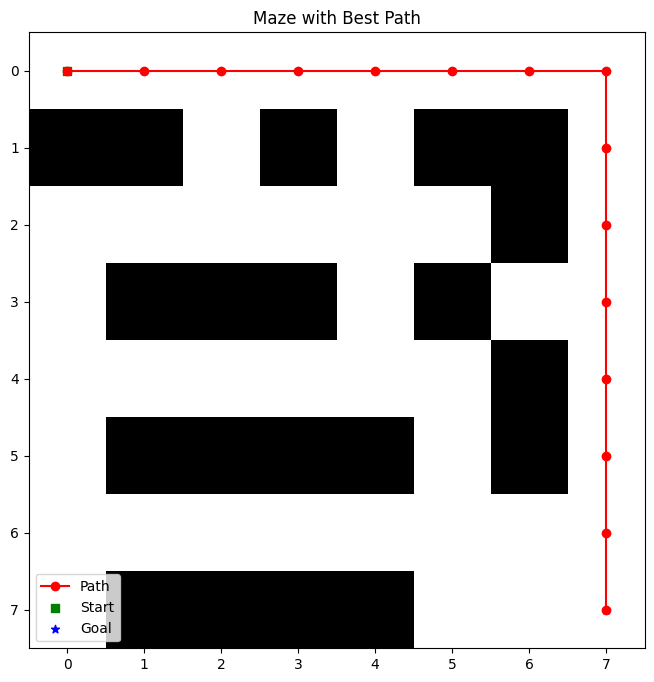

In [ ]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x
            continue
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True
    return path_taken, False

def fitness_function(path_taken, start_position, goal_position):
    last_position = path_taken[-1]
    distance_to_goal = abs(last_position[0] - goal_position[0]) + abs(last_position[1] - goal_position[1])
    reward_for_goal = max(0, 100 - distance_to_goal)
    penalty_for_length = len(path_taken)
    fitness_score = reward_for_goal - penalty_for_length
    return fitness_score

# Individual class
class individual:
    def __init__(self, prob):
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]
        path_taken, reached_goal = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(path_taken, prob.start_position, prob.goal_position)
        self.path_taken = path_taken
        self.reached_goal = reached_goal

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 200
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 0, 1, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (7, 7)

class parameters:
    def __init__(self):
        self.population = 1000
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = individual(prob)
    best_solution.cost = -float('inf')

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for _iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {_iteration}: Best cost = {best_solution.cost}")

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)

Generation 0: Best cost = 181250
Generation 1: Best cost = 181250
Generation 2: Best cost = 181250
Generation 3: Best cost = 181250
Generation 4: Best cost = 181250
Generation 5: Best cost = 181250
Generation 6: Best cost = 181250
Generation 7: Best cost = 181250
Generation 8: Best cost = 181250
Generation 9: Best cost = 181250
Generation 10: Best cost = 181250
Generation 11: Best cost = 181250
Generation 12: Best cost = 181250
Generation 13: Best cost = 181250
Generation 14: Best cost = 181250
Generation 15: Best cost = 181250
Generation 16: Best cost = 181250
Generation 17: Best cost = 181250
Generation 18: Best cost = 181250
Generation 19: Best cost = 181250
Generation 20: Best cost = 181250
Generation 21: Best cost = 181250
Generation 22: Best cost = 181250
Generation 23: Best cost = 181250
Generation 24: Best cost = 181250
Generation 25: Best cost = 181250
Generation 26: Best cost = 181250
Generation 27: Best cost = 181250
Generation 28: Best cost = 181250
Generation 29: Best cost

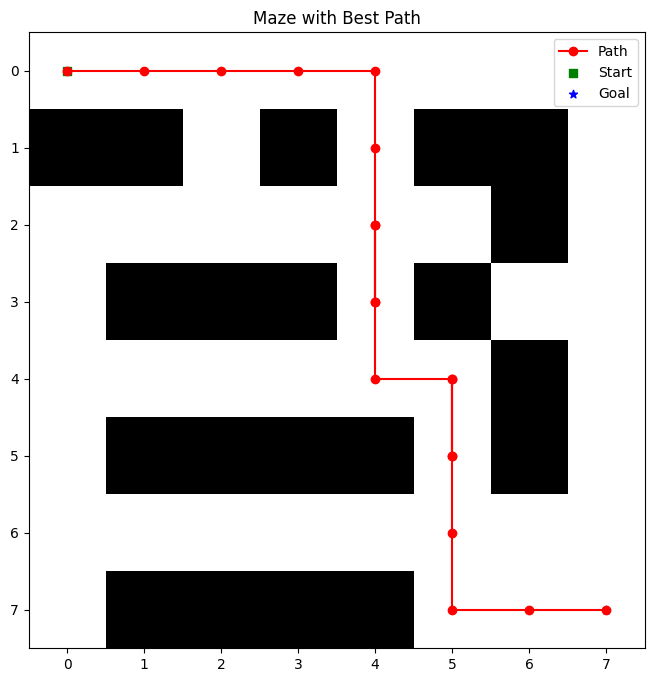

In [ ]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    invalid_moves = 0
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x
            invalid_moves += 1
            continue
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True, invalid_moves
    return path_taken, False, invalid_moves

def fitness_function(path_taken, start_position, goal_position, chromosome_length, invalid_moves):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Reward for reaching the goal earlier
    if last_position == goal_position:
        goal_reward = 1000 * (chromosome_length - steps_taken)
    else:
        goal_reward = 0

    # Penalty for invalid moves
    invalid_move_penalty = 100 * invalid_moves

    # Reward for unique moves (non-repeating positions)
    unique_positions = len(set(path_taken))
    unique_move_reward = 10 * unique_positions

    # Total fitness
    fitness_score = goal_reward + unique_move_reward - invalid_move_penalty
    return fitness_score

# Individual class
class individual:
    def __init__(self, prob):
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]
        path_taken, reached_goal, invalid_moves = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(path_taken, prob.start_position, prob.goal_position, prob.number_of_genes, invalid_moves)
        self.path_taken = path_taken
        self.reached_goal = reached_goal
        self.invalid_moves = invalid_moves

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 200
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 0, 1, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (7, 7)

class parameters:
    def __init__(self):
        self.population = 1000
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = individual(prob)
    best_solution.cost = -float('inf')

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for _iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {_iteration}: Best cost = {best_solution.cost}")

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Invalid moves:", bs.invalid_moves)
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)

Generation 0: Best cost = 152290
Generation 1: Best cost = 152290
Generation 2: Best cost = 152290
Generation 3: Best cost = 152290
Generation 4: Best cost = 152290
Generation 5: Best cost = 152290
Generation 6: Best cost = 152290
Generation 7: Best cost = 152290
Generation 8: Best cost = 152290
Generation 9: Best cost = 152290
Generation 10: Best cost = 152290
Generation 11: Best cost = 152290
Generation 12: Best cost = 152290
Generation 13: Best cost = 152290
Generation 14: Best cost = 152290
Generation 15: Best cost = 152290
Generation 16: Best cost = 152290
Generation 17: Best cost = 152290
Generation 18: Best cost = 152290
Generation 19: Best cost = 152290
Generation 20: Best cost = 152290
Generation 21: Best cost = 152290
Generation 22: Best cost = 152290
Generation 23: Best cost = 152290
Generation 24: Best cost = 152290
Generation 25: Best cost = 152290
Generation 26: Best cost = 152290
Generation 27: Best cost = 152290
Generation 28: Best cost = 152290
Generation 29: Best cost

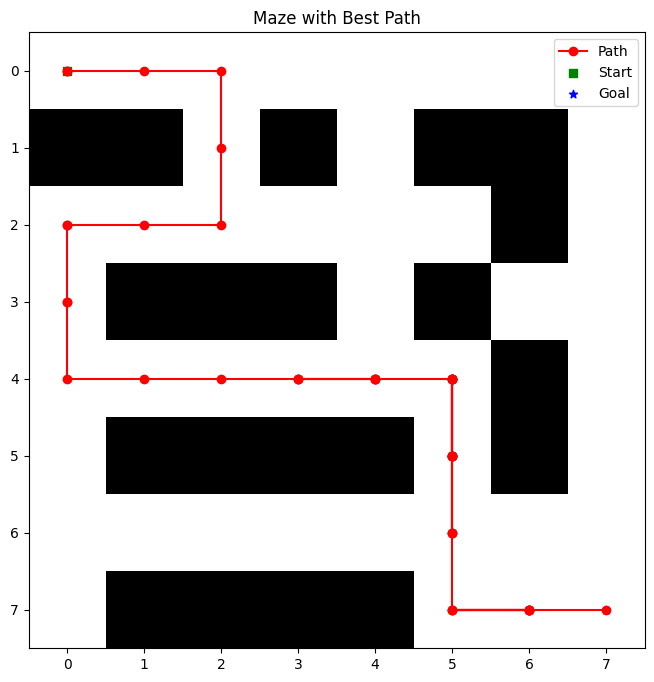

In [ ]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    invalid_moves = 0
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        elif move == 4:  # Standing Still
            if (y, x) == goal_position:
                pass  # Do not move if already at the goal
            else:
                invalid_moves += 1  # Penalize standing still if not at the goal
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x
            invalid_moves += 1
            continue
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True, invalid_moves
    return path_taken, False, invalid_moves

def fitness_function(path_taken, start_position, goal_position, chromosome_length, invalid_moves):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Reward for reaching the goal earlier
    if last_position == goal_position:
        goal_reward = 1000 * (chromosome_length - steps_taken)
    else:
        goal_reward = 0

    # Penalty for invalid moves
    invalid_move_penalty = 100 * invalid_moves

    # Reward for unique moves (non-repeating positions)
    unique_positions = len(set(path_taken))
    unique_move_reward = 10 * unique_positions

    # Total fitness
    fitness_score = goal_reward + unique_move_reward - invalid_move_penalty
    return fitness_score

# Individual class
class individual:
    def __init__(self, prob):
        self.chromosome = [random.choice([0, 1, 2, 3, 4]) for _ in range(prob.number_of_genes)]  # Added move 4 (Standing Still)
        path_taken, reached_goal, invalid_moves = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(path_taken, prob.start_position, prob.goal_position, prob.number_of_genes, invalid_moves)
        self.path_taken = path_taken
        self.reached_goal = reached_goal
        self.invalid_moves = invalid_moves

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3, 4])  # Added move 4 (Standing Still)

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 200
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 0, 1, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0],
            [0, 1, 1, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (7, 7)

class parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 100
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up", 4: "Stand Still"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = individual(prob)
    best_solution.cost = -float('inf')

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for _iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {_iteration}: Best cost = {best_solution.cost}")

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Invalid moves:", bs.invalid_moves)
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)

Generation 0: Best cost = 159600
Generation 1: Best cost = 159600
Generation 2: Best cost = 159600
Generation 3: Best cost = 159600
Generation 4: Best cost = 159600
Generation 5: Best cost = 159600
Generation 6: Best cost = 159600
Generation 7: Best cost = 159600
Generation 8: Best cost = 159600
Generation 9: Best cost = 159600
Generation 10: Best cost = 159600
Generation 11: Best cost = 159600
Generation 12: Best cost = 159600
Generation 13: Best cost = 159600
Generation 14: Best cost = 159600
Generation 15: Best cost = 159600
Generation 16: Best cost = 159600
Generation 17: Best cost = 159600
Generation 18: Best cost = 159600
Generation 19: Best cost = 159600
Generation 20: Best cost = 159600
Generation 21: Best cost = 159600
Generation 22: Best cost = 159600
Generation 23: Best cost = 159600
Generation 24: Best cost = 159600
Generation 25: Best cost = 159600
Generation 26: Best cost = 159600
Generation 27: Best cost = 159600
Generation 28: Best cost = 159600
Generation 29: Best cost

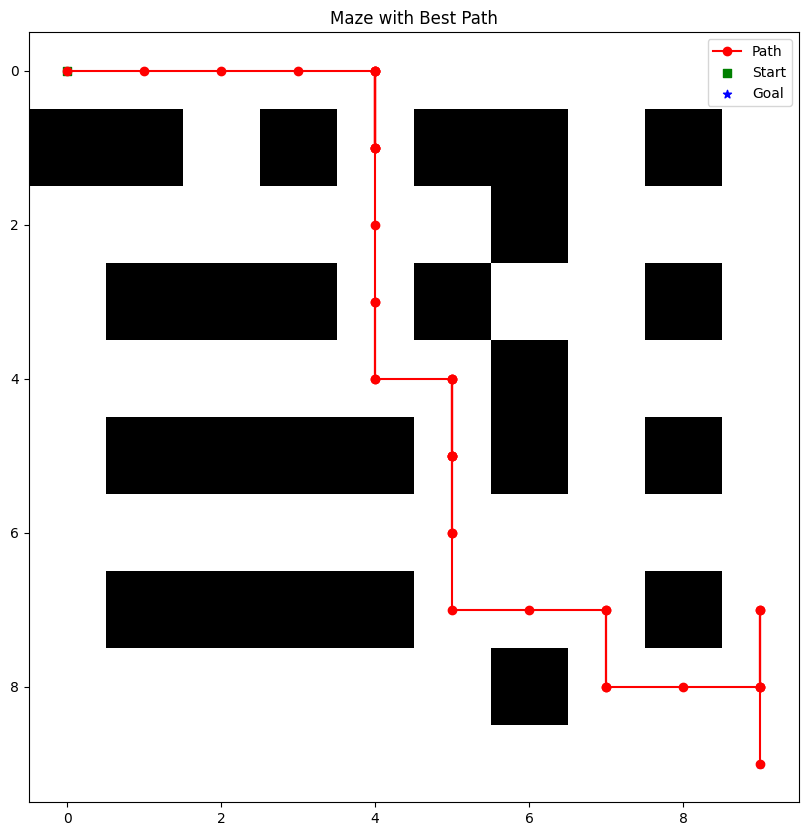

In [ ]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    invalid_moves = 0
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            y, x = prev_y, prev_x
            invalid_moves += 1
            continue
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True, invalid_moves
    return path_taken, False, invalid_moves

def fitness_function(path_taken, start_position, goal_position, chromosome_length, invalid_moves):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Reward for reaching the goal earlier
    if last_position == goal_position:
        goal_reward = 1000 * (chromosome_length - steps_taken)
    else:
        goal_reward = 0

    # Penalty for invalid moves
    invalid_move_penalty = 100 * invalid_moves

    # Reward for unique moves (non-repeating positions)
    unique_positions = len(set(path_taken))
    unique_move_reward = 20 * unique_positions  # Increased reward for unique positions

    # Total fitness
    fitness_score = goal_reward + unique_move_reward - invalid_move_penalty
    return fitness_score

# Individual class
class individual:
    def __init__(self, prob):
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]  # Removed move 4 (Standing Still)
        path_taken, reached_goal, invalid_moves = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(path_taken, prob.start_position, prob.goal_position, prob.number_of_genes, invalid_moves)
        self.path_taken = path_taken
        self.reached_goal = reached_goal
        self.invalid_moves = invalid_moves

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])  # Removed move 4 (Standing Still)

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 200
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (9, 9)

class parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 1500  # Number of generations
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm with better stopping criteria
def run_genetic(prob, params):
    population = []
    best_solution = individual(prob)
    best_solution.cost = -float('inf')

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    iteration = 0
    stagnation_count = 0  # To track stagnation
    last_best_cost = -float('inf')

    while True:
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])
            stagnation_count = 0  # Reset stagnation counter
        else:
            stagnation_count += 1

        # Stop if there's no improvement for a set number of generations
        if stagnation_count >= 100:  # If no improvement in 100 generations
            print("Stagnation reached. Stopping early.")
            break

        # Stop if the best solution reaches the goal with the maximum possible fitness
        if best_solution.reached_goal and best_solution.cost >= 1000 * (prob.number_of_genes - len(best_solution.path_taken) + 1):
            print("Goal reached with high fitness!")
            break

        # Stop after a maximum number of generations
        if iteration >= params.number_of_generations:
            print("Maximum number of generations reached.")
            break

        # Check if no progress has been made
        if best_solution.cost == last_best_cost:
            stagnation_count += 1
        else:
            stagnation_count = 0
        last_best_cost = best_solution.cost

        print(f"Generation {iteration}: Best cost = {best_solution.cost}")

        iteration += 1

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Invalid moves:", bs.invalid_moves)
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)


KeyboardInterrupt: 

Generation 0: Best cost = -40950
Generation 1: Best cost = -39950
Generation 2: Best cost = -39950
Generation 3: Best cost = -37940
Generation 4: Best cost = -37940
Generation 5: Best cost = -37940
Generation 6: Best cost = -37930
Generation 7: Best cost = -36930
Generation 8: Best cost = -34930
Generation 9: Best cost = -34930
Generation 10: Best cost = -34930
Generation 11: Best cost = -34930
Generation 12: Best cost = -34930
Generation 13: Best cost = -34930
Generation 14: Best cost = -34920
Generation 15: Best cost = -33930
Generation 16: Best cost = -33930
Generation 17: Best cost = -32950
Generation 18: Best cost = -30890
Generation 19: Best cost = -30890
Generation 20: Best cost = -28900
Generation 21: Best cost = -28900
Generation 22: Best cost = -28900
Generation 23: Best cost = -28900
Generation 24: Best cost = -28900
Generation 25: Best cost = -26880
Generation 26: Best cost = -26880
Generation 27: Best cost = -26880
Generation 28: Best cost = -26880
Generation 29: Best cost

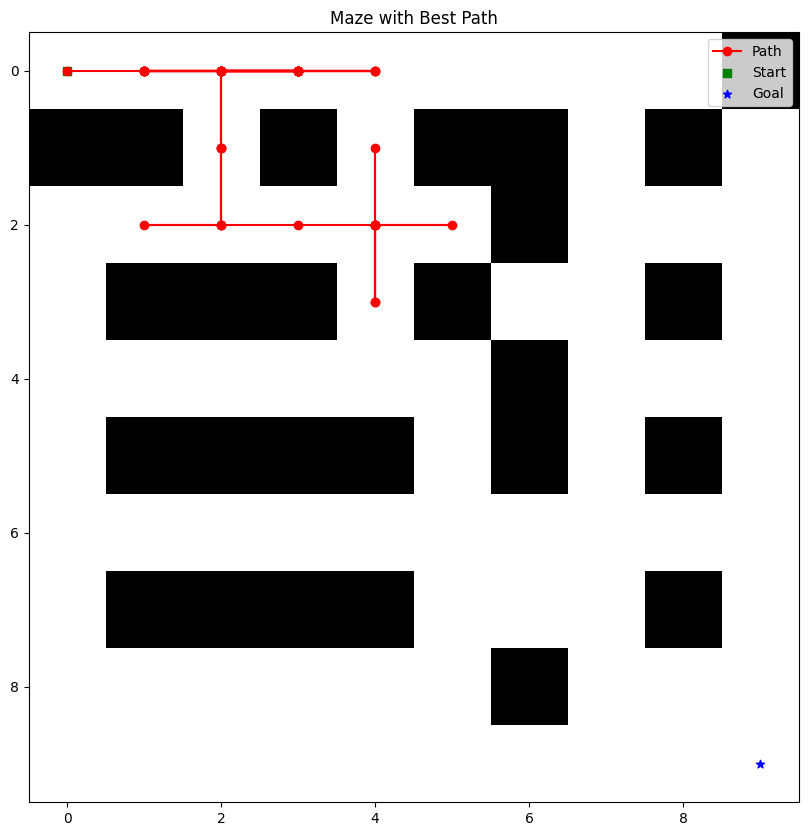

In [27]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            return path_taken, False  # Invalid path
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True  # Valid path reaching the goal
    return path_taken, False  # Valid path but did not reach the goal

def fitness_function(path_taken, start_position, goal_position, chromosome_length):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Increase the reward for reaching the goal
    if last_position == goal_position:
        goal_reward = 5000000  # Increased reward for reaching the goal
        # Penalize longer paths (reward shorter paths more)
        path_length_penalty = 10000 * steps_taken
    else:
        goal_reward = 0
        # Penalize paths that don't reach the goal
        path_length_penalty = 1000 * (chromosome_length - steps_taken)

    # Reward for unique moves (non-repeating positions)
    unique_positions = len(set(path_taken))
    unique_move_reward = 10 * unique_positions

    # Total fitness
    fitness_score = goal_reward + unique_move_reward - path_length_penalty
    return fitness_score


# Individual class
class individual:
    def __init__(self, prob):
        self.prob = prob  # Store the problem instance
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]  # Only moves 0-3 (Right, Down, Left, Up)
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(self.path_taken, prob.start_position, prob.goal_position, prob.number_of_genes)

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])  # Only moves 0-3 (Right, Down, Left, Up)
        # Re-evaluate after mutation
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        self.cost = fitness_function(self.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        # Re-evaluate after crossover
        child1.path_taken, child1.reached_goal = simulate_path(child1.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child1.cost = fitness_function(child1.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        child2.path_taken, child2.reached_goal = simulate_path(child2.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child2.cost = fitness_function(child2.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 50  # Reduced to encourage shorter paths
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (9, 9)

class parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 1000
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = None

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if best_solution is None or new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {iteration}: Best cost = {best_solution.cost}")

        # Stop if the best solution reaches the goal with the minimum possible steps
        if best_solution.reached_goal and len(best_solution.path_taken) == prob.number_of_genes:
            break

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)


Generation 0: Best cost = -11910
Generation 1: Best cost = -11910
Generation 2: Best cost = -9930
Generation 3: Best cost = -2930
Generation 4: Best cost = -2930
Generation 5: Best cost = -2930
Generation 6: Best cost = -2930
Generation 7: Best cost = -2930
Generation 8: Best cost = 110
Generation 9: Best cost = 110
Generation 10: Best cost = 110
Generation 11: Best cost = 110
Generation 12: Best cost = 110
Generation 13: Best cost = 110
Generation 14: Best cost = 110
Generation 15: Best cost = 110
Generation 16: Best cost = 110
Generation 17: Best cost = 110
Generation 18: Best cost = 110
Generation 19: Best cost = 110
Generation 20: Best cost = 110
Generation 21: Best cost = 110
Generation 22: Best cost = 110
Generation 23: Best cost = 110
Generation 24: Best cost = 110
Generation 25: Best cost = 110
Generation 26: Best cost = 110
Generation 27: Best cost = 110
Generation 28: Best cost = 110
Generation 29: Best cost = 110
Generation 30: Best cost = 150
Generation 31: Best cost = 150


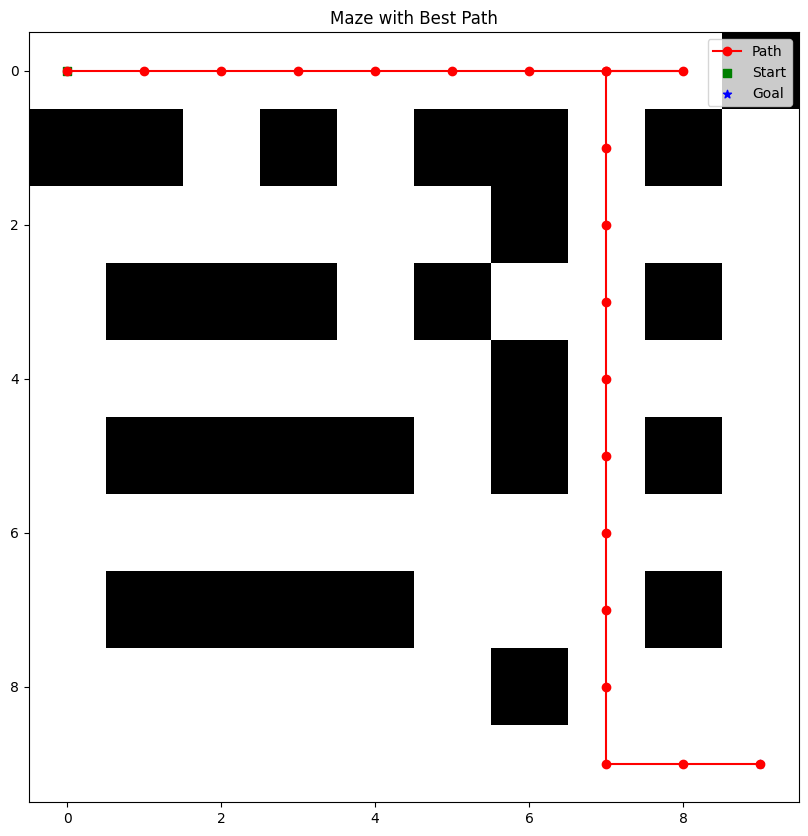

In [49]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            return path_taken, False  # Invalid path
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True  # Valid path reaching the goal
    return path_taken, False  # Valid path but did not reach the goal

def fitness_function(path_taken, start_position, goal_position, chromosome_length):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Increase the reward for reaching the goal
    if last_position == goal_position:
        goal_reward = 1000000  # Increased reward for reaching the goal
        # Penalize longer paths more heavily
        path_length_penalty = 10000 * steps_taken
    else:
        goal_reward = 0
        # Penalize paths that don't reach the goal more heavily
        path_length_penalty = 1000 * (chromosome_length - steps_taken)

    # Reward for unique moves (non-repeating positions)
    unique_positions = len(set(path_taken))
    unique_move_reward = 10 * unique_positions

    # Total fitness
    fitness_score = goal_reward + unique_move_reward - path_length_penalty
    return fitness_score


# Individual class
class individual:
    def __init__(self, prob):
        self.prob = prob  # Store the problem instance
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]  # Only moves 0-3 (Right, Down, Left, Up)
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(self.path_taken, prob.start_position, prob.goal_position, prob.number_of_genes)

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])  # Only moves 0-3 (Right, Down, Left, Up)
        # Re-evaluate after mutation
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        self.cost = fitness_function(self.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        # Re-evaluate after crossover
        child1.path_taken, child1.reached_goal = simulate_path(child1.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child1.cost = fitness_function(child1.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        child2.path_taken, child2.reached_goal = simulate_path(child2.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child2.cost = fitness_function(child2.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 20  # Reduced to encourage shorter paths
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (9, 9)

class parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 1000
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.2  # Increased mutation rate for more exploration

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = None

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if best_solution is None or new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {iteration}: Best cost = {best_solution.cost}")

        # Stop if the best solution reaches the goal with the minimum possible steps
        if best_solution.reached_goal and len(best_solution.path_taken) == prob.number_of_genes:
            break

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)

Generation 0: Best cost = -14000
Generation 1: Best cost = -12000
Generation 2: Best cost = -12000
Generation 3: Best cost = -12000
Generation 4: Best cost = -12000
Generation 5: Best cost = -12000
Generation 6: Best cost = -12000
Generation 7: Best cost = -12000
Generation 8: Best cost = -12000
Generation 9: Best cost = -11000
Generation 10: Best cost = -11000
Generation 11: Best cost = -11000
Generation 12: Best cost = -11000
Generation 13: Best cost = -10000
Generation 14: Best cost = -10000
Generation 15: Best cost = -10000
Generation 16: Best cost = -10000
Generation 17: Best cost = -10000
Generation 18: Best cost = -10000
Generation 19: Best cost = -10000
Generation 20: Best cost = -10000
Generation 21: Best cost = -8000
Generation 22: Best cost = -8000
Generation 23: Best cost = -8000
Generation 24: Best cost = -8000
Generation 25: Best cost = -8000
Generation 26: Best cost = -8000
Generation 27: Best cost = -8000
Generation 28: Best cost = -8000
Generation 29: Best cost = -8000

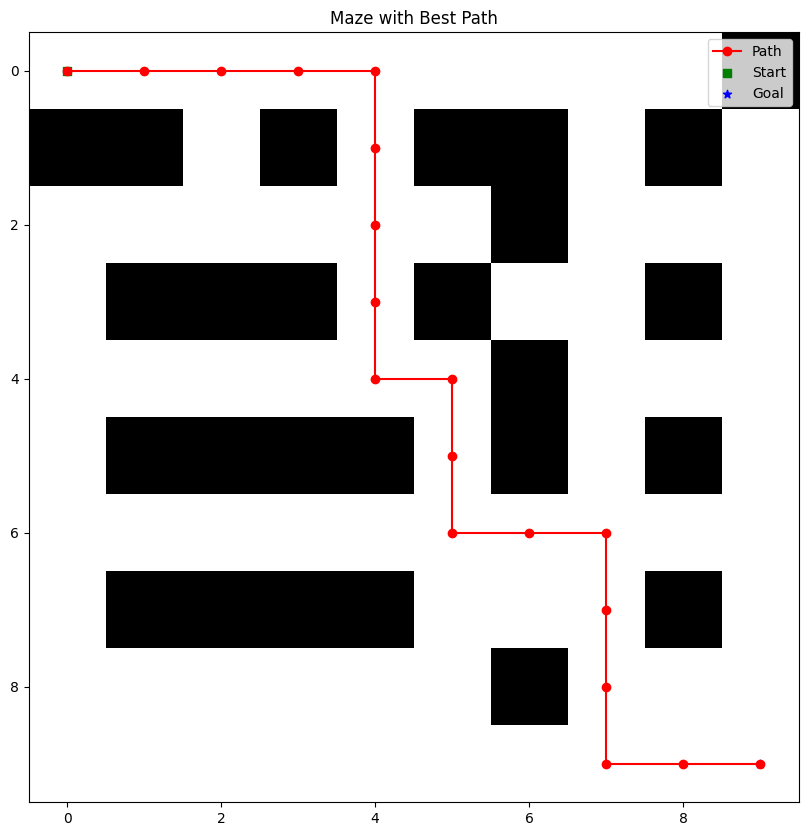

In [50]:
import numpy as np
from copy import deepcopy
import random
import matplotlib.pyplot as plt

# Maze and simulation functions
def simulate_path(chromosome, start_position, goal_position, maze):
    y, x = start_position
    path_taken = [(x, y)]
    for move in chromosome:
        prev_y, prev_x = y, x
        if move == 0:  # Right
            x += 1
        elif move == 1:  # Down
            y += 1
        elif move == 2:  # Left
            x -= 1
        elif move == 3:  # Up
            y -= 1
        # Check for invalid moves (out of bounds or hitting a wall)
        if y < 0 or x < 0 or y >= len(maze) or x >= len(maze[0]) or maze[y][x] == 1:
            return path_taken, False  # Invalid path
        path_taken.append((x, y))
        if (y, x) == goal_position:
            return path_taken, True  # Valid path reaching the goal
    return path_taken, False  # Valid path but did not reach the goal

def fitness_function(path_taken, start_position, goal_position, chromosome_length):
    last_position = path_taken[-1]
    steps_taken = len(path_taken) - 1  # Subtract 1 to exclude the start position

    # Increase the reward for reaching the goal
    if last_position == goal_position:
        goal_reward = 1000000  # Increased reward for reaching the goal
        # Penalize longer paths more heavily
        path_length_penalty = 10000 * steps_taken
    else:
        goal_reward = 0
        # Penalize paths that don't reach the goal more heavily
        path_length_penalty = 1000 * (chromosome_length - steps_taken)

    # Penalize revisiting the same position
    unique_positions = len(set(path_taken))
    position_repetition_penalty = 1000 * (len(path_taken) - unique_positions)

    # Total fitness
    fitness_score = goal_reward - path_length_penalty - position_repetition_penalty
    return fitness_score


# Individual class
class individual:
    def __init__(self, prob):
        self.prob = prob  # Store the problem instance
        self.chromosome = [random.choice([0, 1, 2, 3]) for _ in range(prob.number_of_genes)]  # Only moves 0-3 (Right, Down, Left, Up)
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, prob.start_position, prob.goal_position, prob.maze)
        self.cost = fitness_function(self.path_taken, prob.start_position, prob.goal_position, prob.number_of_genes)

    def mutate(self, rate_of_gene_mutation):
        for index in range(len(self.chromosome)):
            if np.random.uniform() < rate_of_gene_mutation:
                self.chromosome[index] = random.choice([0, 1, 2, 3])  # Only moves 0-3 (Right, Down, Left, Up)
        # Re-evaluate after mutation
        self.path_taken, self.reached_goal = simulate_path(self.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        self.cost = fitness_function(self.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)

    def crossover(self, parent2):
        crossover_point = random.randint(1, len(self.chromosome) - 1)
        child1 = deepcopy(self)
        child2 = deepcopy(parent2)
        child1.chromosome = self.chromosome[:crossover_point] + parent2.chromosome[crossover_point:]
        child2.chromosome = parent2.chromosome[:crossover_point] + self.chromosome[crossover_point:]
        # Re-evaluate after crossover
        child1.path_taken, child1.reached_goal = simulate_path(child1.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child1.cost = fitness_function(child1.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        child2.path_taken, child2.reached_goal = simulate_path(child2.chromosome, self.prob.start_position, self.prob.goal_position, self.prob.maze)
        child2.cost = fitness_function(child2.path_taken, self.prob.start_position, self.prob.goal_position, self.prob.number_of_genes)
        return child1, child2

# Problem and Parameters
class problem:
    def __init__(self):
        self.number_of_genes = 20  # Reduced to encourage shorter paths
        self.maze = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        ]
        self.start_position = (0, 0)
        self.goal_position = (9, 9)

class parameters:
    def __init__(self):
        self.population = 100
        self.number_of_generations = 1000
        self.child_rate_per_generation = 1
        self.gene_mutate_rate = 0.3  # Increased mutation rate for more exploration

# Function to choose indices for parents
def choose_indices_from(number_in_list):
    index_1 = np.random.randint(number_in_list)
    index_2 = np.random.randint(number_in_list)
    if index_1 == index_2:
        return choose_indices_from(number_in_list)
    return index_1, index_2

# Function to translate chromosome into directions
def translate_chromosome(chromosome):
    direction_map = {0: "Right", 1: "Down", 2: "Left", 3: "Up"}
    return [direction_map[move] for move in chromosome]

# Function to visualize the maze and path
def visualize_maze_and_path(maze, path_taken, start_position, goal_position):
    maze_array = np.array(maze)
    plt.figure(figsize=(10, 10))
    plt.imshow(maze_array, cmap="binary", origin="upper")

    # Plot the path
    x_coords = [coord[0] for coord in path_taken]
    y_coords = [coord[1] for coord in path_taken]
    plt.plot(x_coords, y_coords, marker="o", color="red", label="Path")

    # Plot start and goal positions
    plt.scatter(start_position[1], start_position[0], color="green", marker="s", label="Start")
    plt.scatter(goal_position[1], goal_position[0], color="blue", marker="*", label="Goal")

    plt.legend()
    plt.title("Maze with Best Path")
    plt.show()

# Run Genetic Algorithm
def run_genetic(prob, params):
    population = []
    best_solution = None

    # Generate initial population
    for _ in range(params.population):
        new_individual = individual(prob)
        population.append(new_individual)
        if best_solution is None or new_individual.cost > best_solution.cost:
            best_solution = deepcopy(new_individual)

    # Generational Iteration
    for iteration in range(params.number_of_generations):
        children = []
        while len(children) < params.child_rate_per_generation * params.population:
            parent1_index, parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]
            child1, child2 = parent1.crossover(parent2)
            child1.mutate(params.gene_mutate_rate)
            child2.mutate(params.gene_mutate_rate)
            children.append(child1)
            children.append(child2)

        # Add children to population
        population += children
        population = sorted(population, key=lambda x: x.cost, reverse=True)
        population = population[:params.population]

        # Update best solution
        if population[0].cost > best_solution.cost:
            best_solution = deepcopy(population[0])

        print(f"Generation {iteration}: Best cost = {best_solution.cost}")

        # Stop if the best solution reaches the goal with the minimum possible steps
        if best_solution.reached_goal and len(best_solution.path_taken) == prob.number_of_genes:
            break

    return best_solution

# Run Genetic Algorithm
p1 = problem()
par1 = parameters()
bs = run_genetic(p1, par1)

# Output results
print("Best solution chromosome:", bs.chromosome)
print("Translated directions:", translate_chromosome(bs.chromosome))
print("Path taken:", bs.path_taken)

# Visualize the maze and path
visualize_maze_and_path(p1.maze, bs.path_taken, p1.start_position, p1.goal_position)